In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import dataframe_image as dfi

In [2]:
import seaborn as sns

## Dataframe preparation

In [3]:
df1 = pd.read_csv("df_sisal_processed.csv")
df2 = pd.read_csv("df_topics.csv")

In [4]:
# Join two DataFrames on a common column
joined_df = pd.concat([df1, df2.drop(columns=["text"])], axis=1)

In [8]:
#dataframe witough outliers
joined_df_non_outliers = joined_df[joined_df["Topic"] != -1]

In [48]:
joined_df.shape[0]

98263

In [4]:
joined_df.head()

url  \
0  https://www.corrieredellosport.it/news/scommes...   
1  https://ilcentrotirreno.it/sito/sport/228401-m...   
2  https://www.infobetting.com/calcio/quote/svezi...   
3  https://www.infobetting.com/calcio/quote/giapp...   
4  https://www.sportitalia.it/2025/08/12/supercop...   

                         Dominio            published published_date  \
0  http://corrieredellosport.it/  2025-10-09 20:30:00     2025-10-09   
1     http://ilcentrotirreno.it/  2025-08-14 13:34:00     2025-08-14   
2        http://infobetting.com/  2025-08-11 12:36:55     2025-08-11   
3        http://infobetting.com/  2025-09-19 21:22:44     2025-09-19   
4         http://sportitalia.it/  2025-08-12 15:22:19     2025-08-12   

  published_time                                              title  \
0       20:30:00  Pronostico Germania-Lussemburgo, tanti gol a S...   
1       13:34:00           MotoGP, in Austria Marc Marquez favorito   
2       12:36:55  Hammarby - GAIS | quote scommesse 1X2 + under/...   
3       21:22:44                      Cerezo Osaka - Kashiwa Reysol   
4       15:22:19  Supercoppa UEFA, PSG-Tottenham: Les Parisiens ...   

                                             content  \
0  Tutto esaurito alla PreZero Arena di Sinsheim ...   
1  questo tabù e a consolidare il suo primato vis...   
2  Hammarby - GAIS  quote scommesse 1X2 + UNDER/O...   
3  Cerezo Osaka - Kashiwa Reysol  Cerezo Osaka - ...   
4  Si fa sempre più interessante il calcio d’agos...   

                                                text  sentiment         Brand  \
0  Pronostico Germania-Lussemburgo, tanti gol a S...          0   bet365,Snai   
1  MotoGP, in Austria Marc Marquez favorito. ques...          0         Sisal   
2  Hammarby - GAIS | quote scommesse 1X2 + under/...          0        bet365   
3  Cerezo Osaka - Kashiwa Reysol. Cerezo Osaka - ...          0   bet365,Snai   
4  Supercoppa UEFA, PSG-Tottenham: Les Parisiens ...          0  Planetwin365   

   ...    reach                Tipo_di_media post_type   Genere  Paese  \
0  ...  3863234  ONLINENEWS,ONLINENEWS_OTHER      TEXT  UNKNOWN  Italy   
1  ...    14992  ONLINENEWS,ONLINENEWS_OTHER      TEXT     MALE  Italy   
2  ...    94439  ONLINENEWS,ONLINENEWS_OTHER      TEXT  UNKNOWN  Italy   
3  ...    94439  ONLINENEWS,ONLINENEWS_OTHER      TEXT  UNKNOWN  Italy   
4  ...   852123  ONLINENEWS,ONLINENEWS_OTHER      TEXT  UNKNOWN  Italy   

       Città Topic            Timestamp Probability                    Labels  
0       Rome    -1  2025-10-09 20:30:00         0.0             Outlier Topic  
1  Catanzaro    -1  2025-08-14 13:34:00         0.0             Outlier Topic  
2       Rome     0  2025-08-11 12:36:55         1.0  Scommesse e Quote Calcio  
3       Rome     0  2025-09-19 21:22:44         1.0  Scommesse e Quote Calcio  
4       Rome    -1  2025-08-12 15:22:19         0.0             Outlier Topic  

[5 rows x 21 columns]

## Define brand count

In [11]:
# Count how many times Brand contains each brand
brands_to_check = ["Sisal", "bet365", "Lottomatica", "Snai", "Eurobet", "Goldbet", "Betsson", "Planetwin365", "PokerStars", "888Casino"]

# Sort brands by count in descending order
brand_counts = []
for brand in brands_to_check:
    count = joined_df["Brand"].str.contains(brand, case=False, na=False).sum()
    brand_counts.append((brand, count))

# Sort by count descending
brand_counts.sort(key=lambda x: x[1], reverse=True)

# Print results
Brand_counts_df=pd.DataFrame(brand_counts, columns=["Brand", "Count"])
Brand_counts_df

Brand  Count
0          Snai  46361
1         Sisal  18979
2   Lottomatica  14980
3        bet365  13794
4       Eurobet   8874
5       Goldbet   8170
6       Betsson   6613
7     888Casino   5629
8    PokerStars   5402
9  Planetwin365   4294

In [12]:
dfi.export(
    Brand_counts_df,
    "brand_counts_sisal.png",
    table_conversion= "chrome"
)

### sentiment per topic

In [12]:
sentiment_counts = (
    joined_df_non_outliers[joined_df_non_outliers["sentiment"].isin([-1, 1])]
    .groupby(["Labels", "sentiment"])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=[1, -1], fill_value=0)
    .rename(columns={1: "Positivo", -1: "Negativo"})
    .reset_index()
    .sort_values(["Negativo"], ascending=[False])
    .head(10)
    .reset_index(drop=True)
)

sentiment_counts

sentiment                                     Labels  Positivo  Negativo
0                       Betting and Gambling Content       313       108
1                 Borse Europee e Mercati Finanziari       319        49
2                 Lottomatica Stock Discussion Forum       297        39
3                    Online Slot Casino Bonuses 2025      5798        32
4                           Scommesse e Quote Calcio      2266        28
5                 Ripopolamento aree interne Sicilia       719        16
6          Garlasco Case Investigations and Finances         7        15
7                   Mooney Callable Bonds Discussion        15         8
8                     Coppa d'Africa 2025 Pronostici        38         3
9                           Horse Racing Events 2025        50         2

In [21]:
zebra_styled = (
    sentiment_counts.style
    .hide(axis="index")
    .apply(
        lambda row: [
            "background-color: #f7f7f7" if row.name % 2 else "background-color: white"
            for _ in row
        ],
        axis=1
    )
)

dfi.export(
    zebra_styled,
    "sentiment_per_topics.png",
    table_conversion="matplotlib"
)

### check periods for peaks

In [6]:
# Count topics between 03/11 and 10/11 (inclusive)
date_series = pd.to_datetime(joined_df["published_date"], errors="coerce", dayfirst=True)
mask = date_series.between(pd.Timestamp("2025-12-01"), pd.Timestamp("2025-12-08"))

topic_counts_period = (
    joined_df.loc[mask, "Labels"]
    .value_counts()
    .rename_axis("Topic")
    .reset_index(name="Count")
    .sort_values("Count", ascending=False)
)

topic_counts_period

Topic  Count
0                           Outlier Topic    435
1                Scommesse e Quote Calcio    319
2         Online Slot Casino Bonuses 2025     39
3            Betting and Gambling Content     24
4        Illegal Gambling Market Research     17
5      Australian Football Betting Quotes     15
6   Premier League Match Predictions 2025      9
7          Coppa d'Africa 2025 Pronostici      7
8      Ripopolamento aree interne Sicilia      6
9               Online Betting and Gaming      2
10     Borse Europee e Mercati Finanziari      2
11              NBA Betting Odds Analysis      1
12   Futuro dell'intrattenimento digitale      1

### outliers counts per topics

In [50]:
# Count how many times Brand contains each brand
brands_to_check = ["Sisal", "bet365", "Lottomatica", "Snai", "Eurobet", "Goldbet", "Betsson", "Planetwin365", "PokerStars", "888Casino"]

#count outliers for each brand
joined_df_outliers = joined_df[joined_df["Topic"] == -1]

# Sort brands by count in descending order
brand_counts = []
for brand in brands_to_check:
    count = joined_df_outliers["Brand"].str.contains(brand, case=False, na=False).sum()
    brand_counts.append((brand, count))

# Sort by count descending
brand_counts.sort(key=lambda x: x[1], reverse=True)

# Print results
Brand_counts_df=pd.DataFrame(brand_counts, columns=["Brand", "Count"])
Brand_counts_df

Brand  Count
0          Snai  15598
1         Sisal   7584
2   Lottomatica   6272
3       Eurobet   4691
4        bet365   4323
5       Betsson   3504
6       Goldbet   3124
7     888Casino   2870
8    PokerStars   2331
9  Planetwin365   1799

Qui definiamo il dataframe senza outliers, che è **joined_df_non_outliers**

In [5]:
joined_df_non_outliers = joined_df[joined_df["Topic"] != -1]
# Count how many times each label appears for non-outliers
label_counts = joined_df_non_outliers["Labels"].value_counts()

# Create a dataframe with labels sorted by count in descending order
label_counts_df = pd.DataFrame({
    "Labels": label_counts.index,
    "Count": label_counts.values
})
label_counts_df

Labels  Count
0                    Scommesse e Quote Calcio  30640
1             Online Slot Casino Bonuses 2025  14820
2                Betting and Gambling Content   3756
3          Ripopolamento aree interne Sicilia   1945
4          Borse Europee e Mercati Finanziari   1507
5       Premier League Match Predictions 2025   1507
6          Lottomatica Stock Discussion Forum   1012
7            Mooney Callable Bonds Discussion    729
8              Gioco Plinko nei Casinò Online    606
9              Coppa d'Africa 2025 Pronostici    554
10                   Horse Racing Events 2025    544
11                 NBA Live Streaming Matches    537
12         Australian Football Betting Quotes    398
13  Garlasco Case Investigations and Finances    366
14                  NBA Betting Odds Analysis    354
15       Futuro dell'intrattenimento digitale    248
16                  Online Betting and Gaming    235
17           Illegal Gambling Market Research    218
18             Siti Scommesse Non AAMS Italia    205
19        X Factor 2025 Finalists Predictions    202

### Brand distribution for each topic

In [10]:
label_counts = joined_df_non_outliers["Labels"].value_counts()
label_counts_df = label_counts.rename_axis("Labels").reset_index(name="Count")
label_counts_df

Labels  Count
0                    Scommesse e Quote Calcio  30640
1             Online Slot Casino Bonuses 2025  14820
2                Betting and Gambling Content   3756
3          Ripopolamento aree interne Sicilia   1945
4          Borse Europee e Mercati Finanziari   1507
5       Premier League Match Predictions 2025   1507
6          Lottomatica Stock Discussion Forum   1012
7            Mooney Callable Bonds Discussion    729
8              Gioco Plinko nei Casinò Online    606
9              Coppa d'Africa 2025 Pronostici    554
10                   Horse Racing Events 2025    544
11                 NBA Live Streaming Matches    537
12         Australian Football Betting Quotes    398
13  Garlasco Case Investigations and Finances    366
14                  NBA Betting Odds Analysis    354
15       Futuro dell'intrattenimento digitale    248
16                  Online Betting and Gaming    235
17           Illegal Gambling Market Research    218
18             Siti Scommesse Non AAMS Italia    205
19        X Factor 2025 Finalists Predictions    202

In [16]:
brands_to_check = [
    "Sisal", "Snai", "Lottomatica", "bet365", "Eurobet",
    "Goldbet", "Betsson", "888Casino", "PokerStars", "Planetwin365"
]

rows = []
for label in joined_df_non_outliers["Labels"].dropna().unique():
    label_df = joined_df_non_outliers[joined_df_non_outliers["Labels"] == label]
    for brand in brands_to_check:
        count = label_df["Brand"].str.contains(brand, case=False, na=False).sum()
        rows.append({"Labels": label, "Brand": brand, "Count": int(count)})

label_brand_counts = (
    pd.DataFrame(rows)
    .sort_values(["Labels", "Count"], ascending=[True, False])
)

label_brand_pivot = label_brand_counts.pivot(
    index="Labels", columns="Brand", values="Count"
).fillna(0).astype(int)

label_brand_counts
label_brand_counts.to_csv("label_brand_counts.csv", index=False)
label_brand_pivot.to_csv("label_brand_pivot.csv")


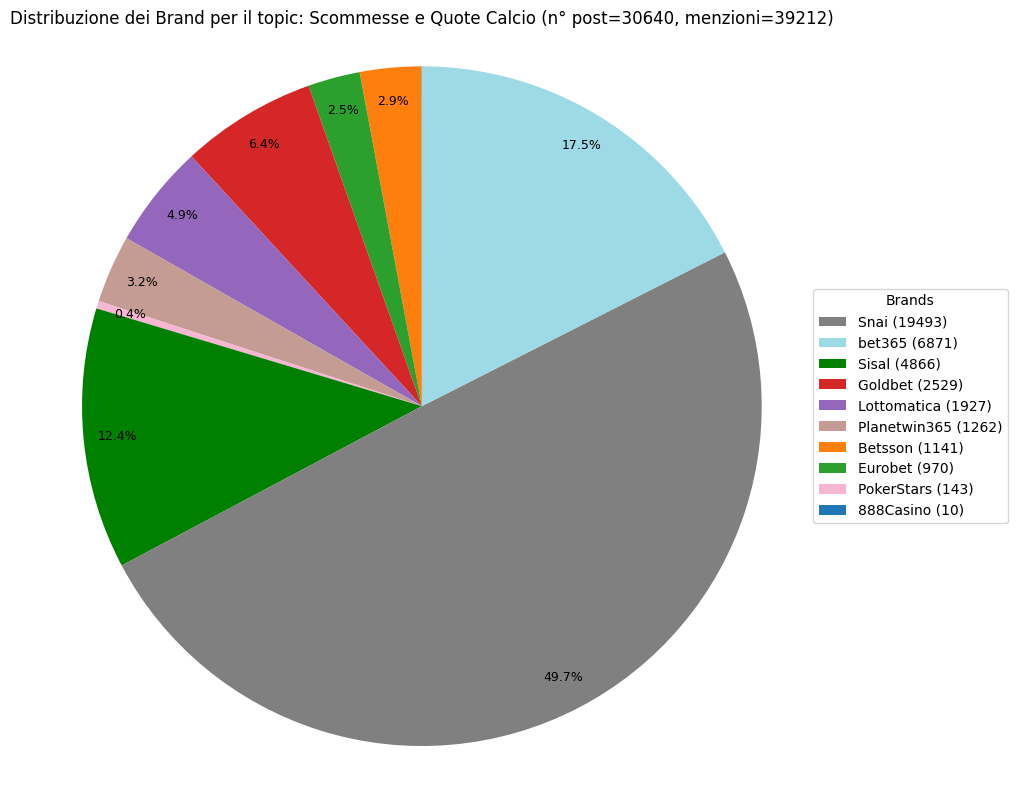

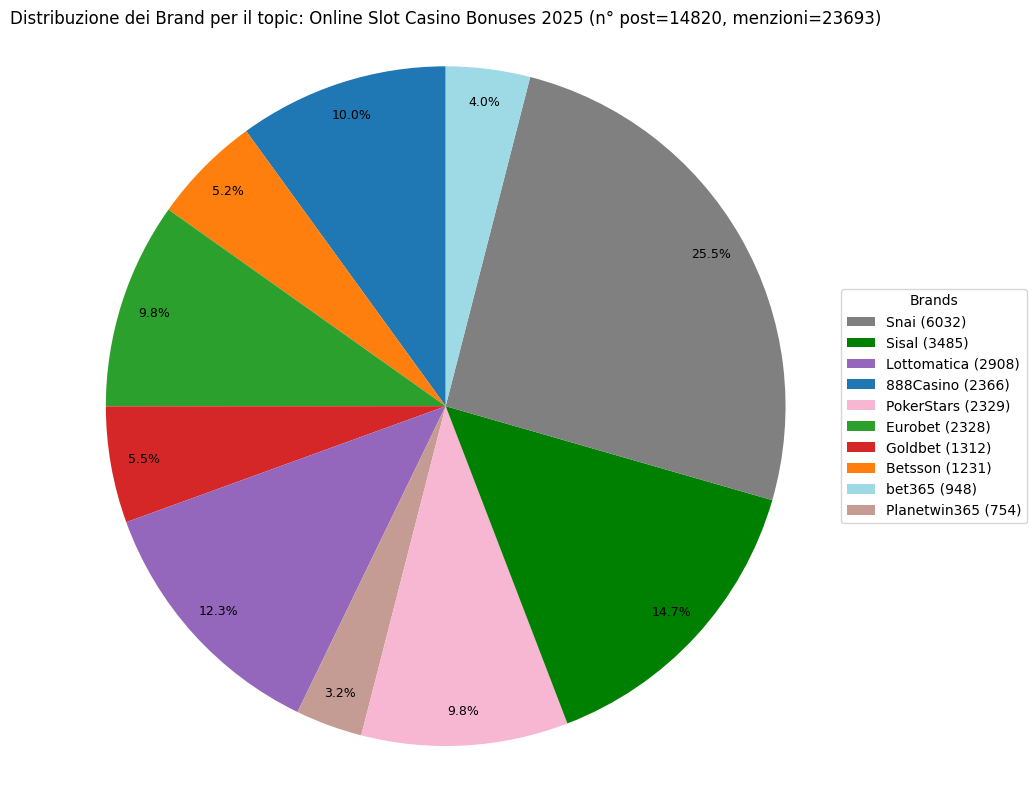

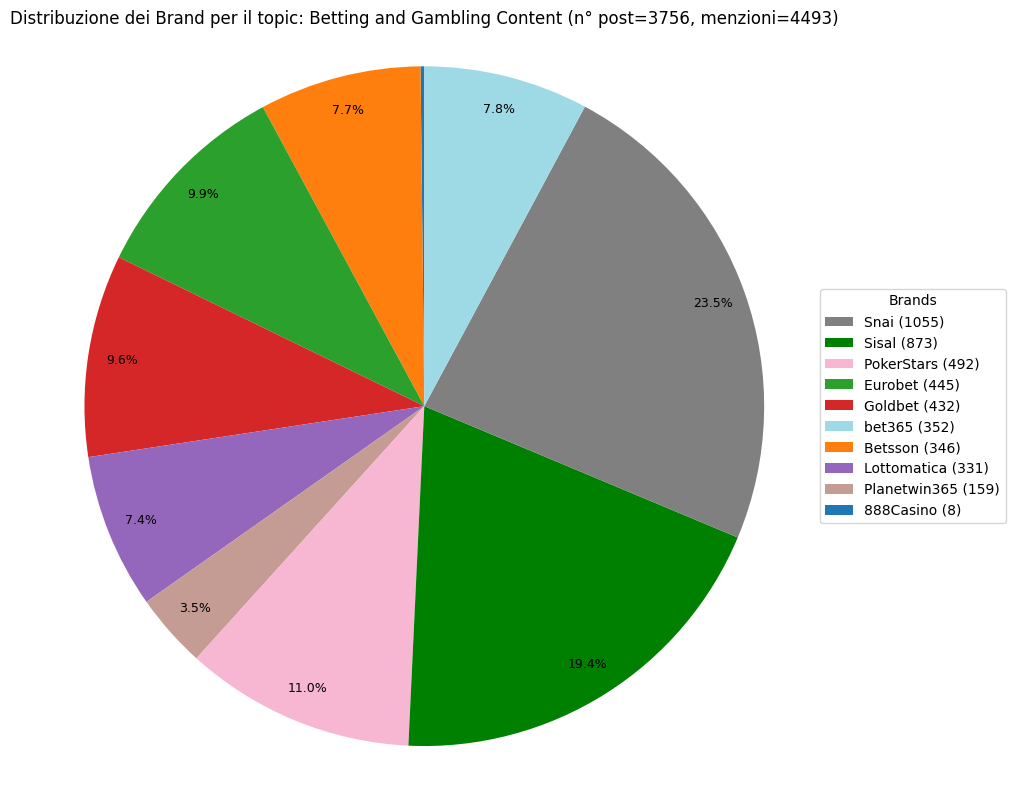

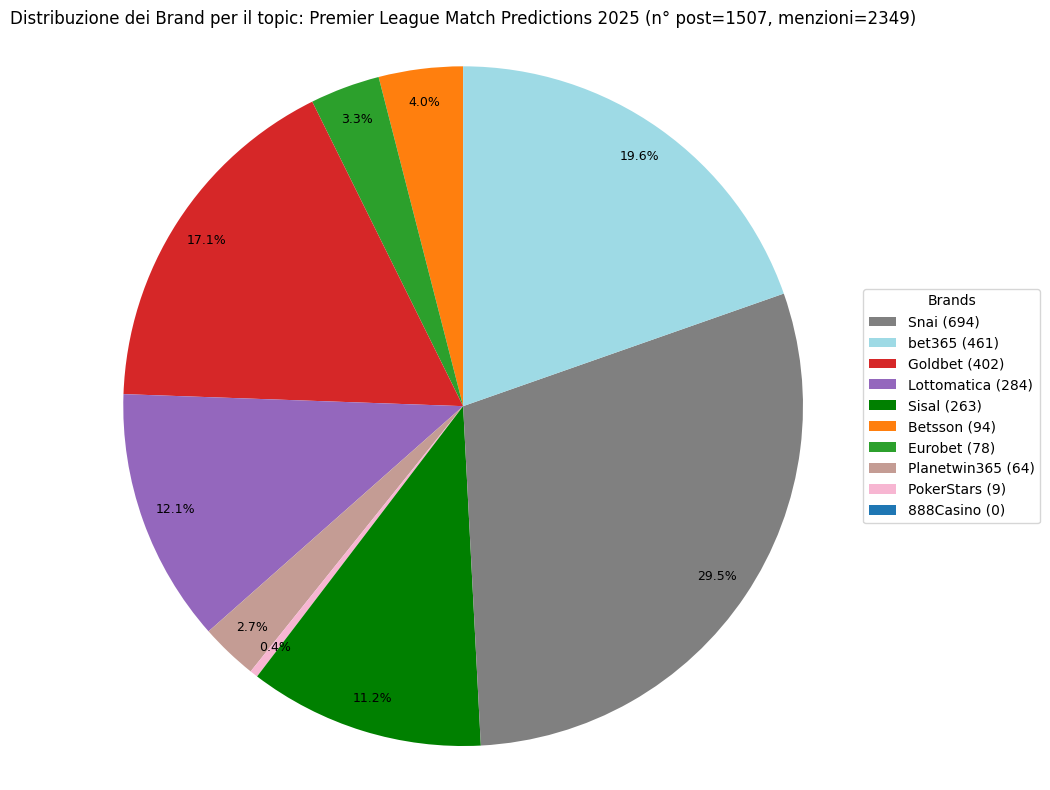

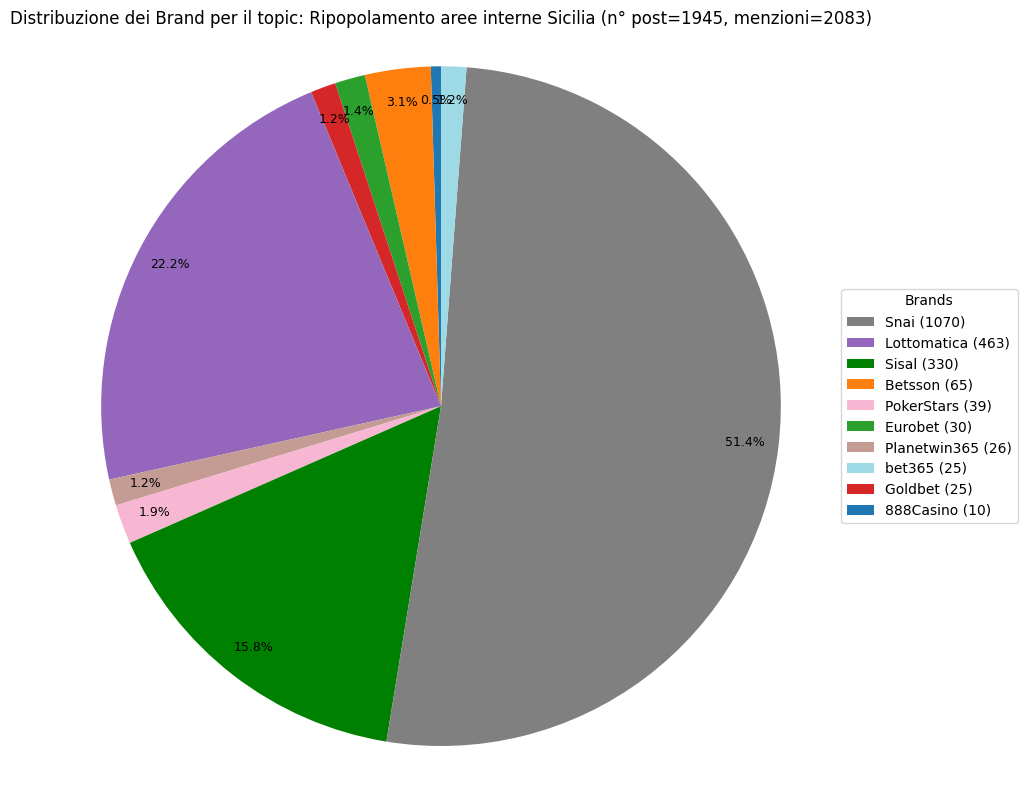

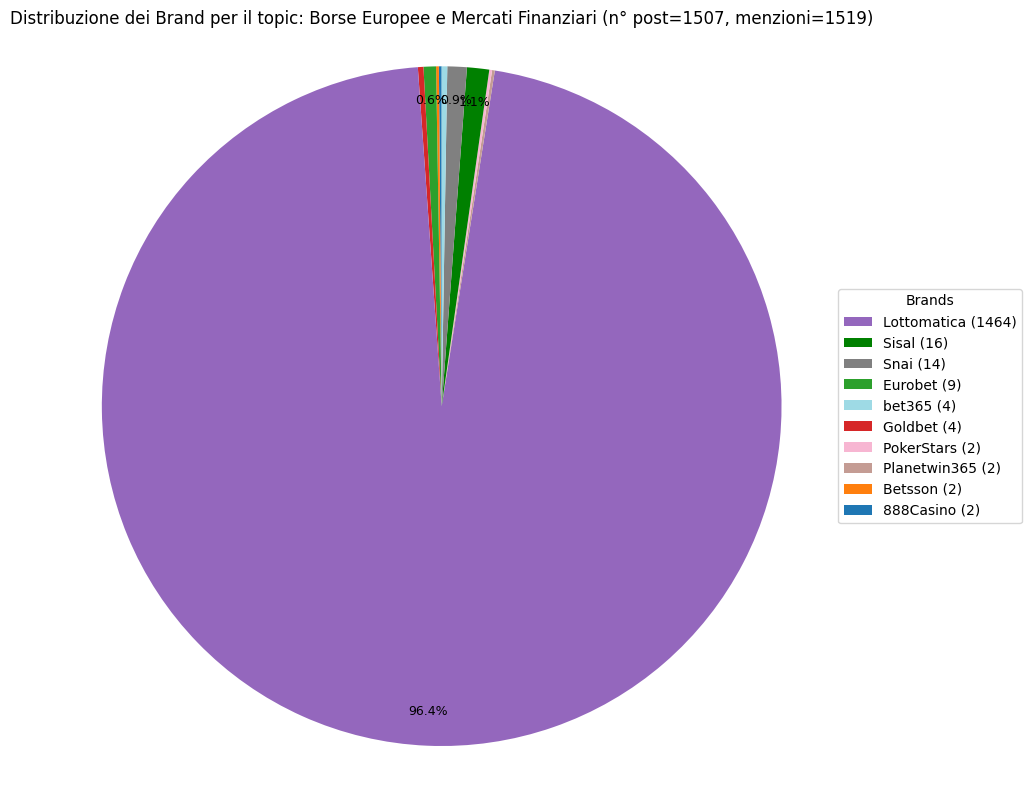

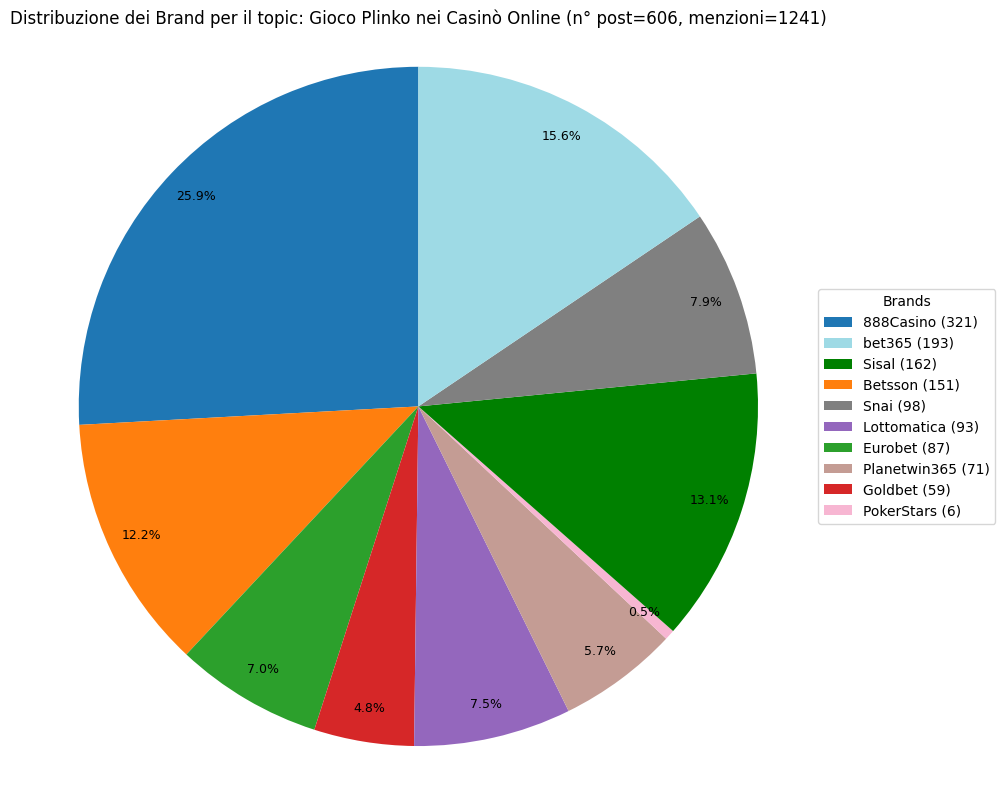

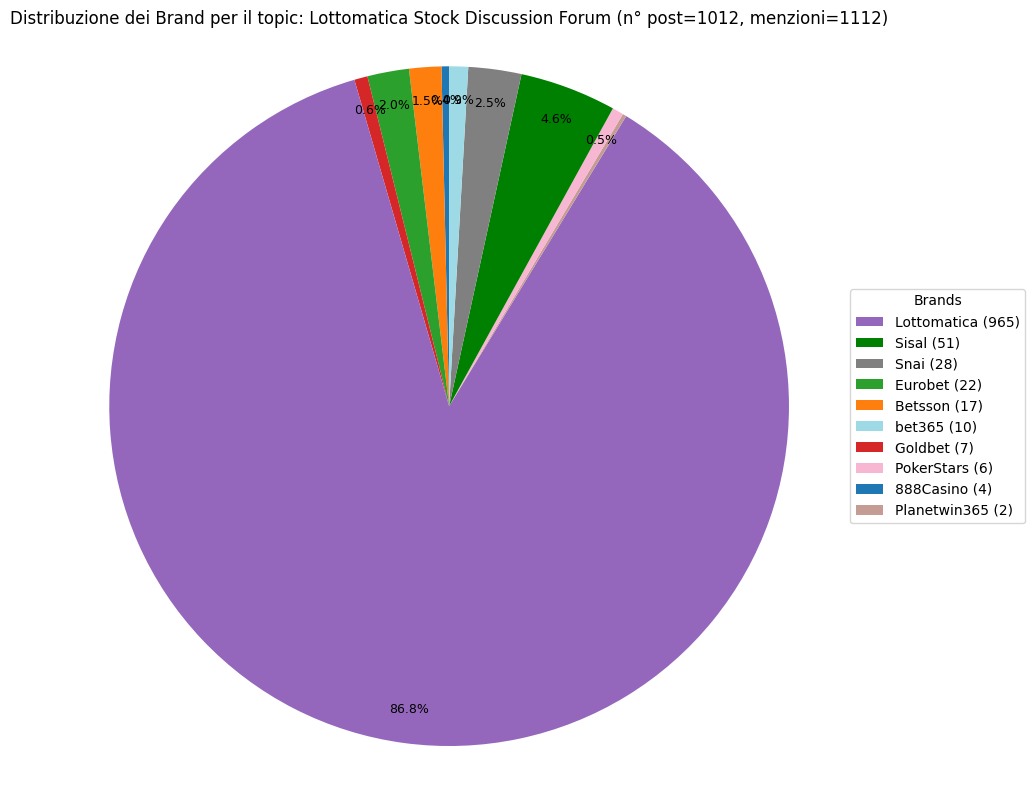

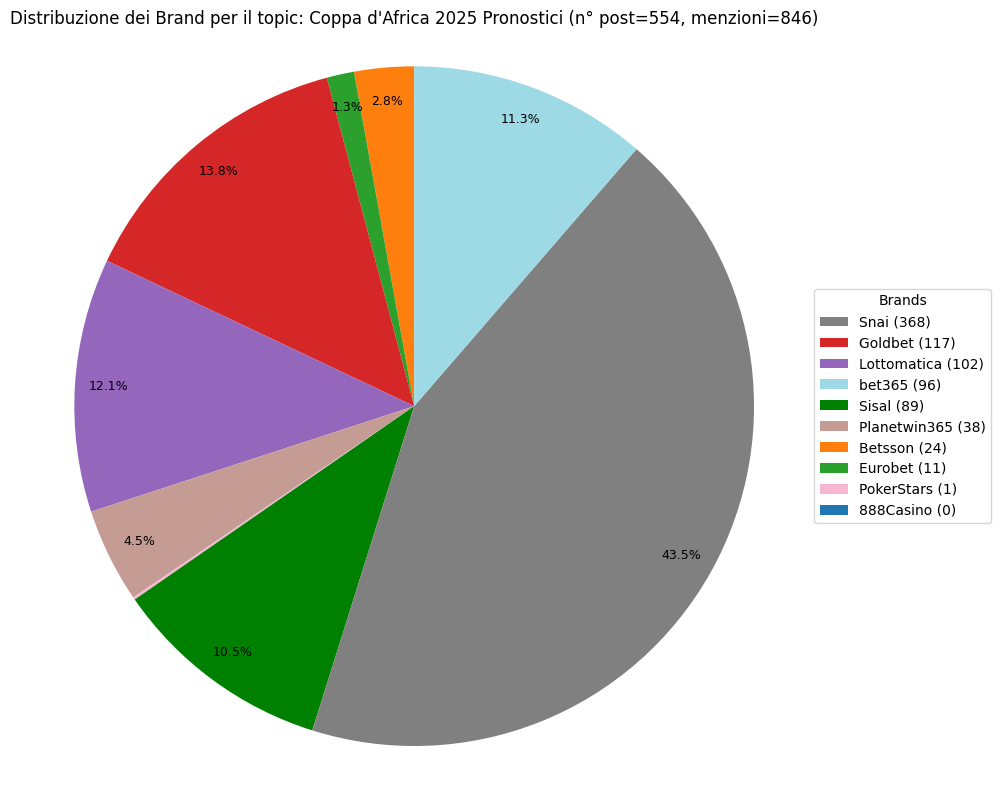

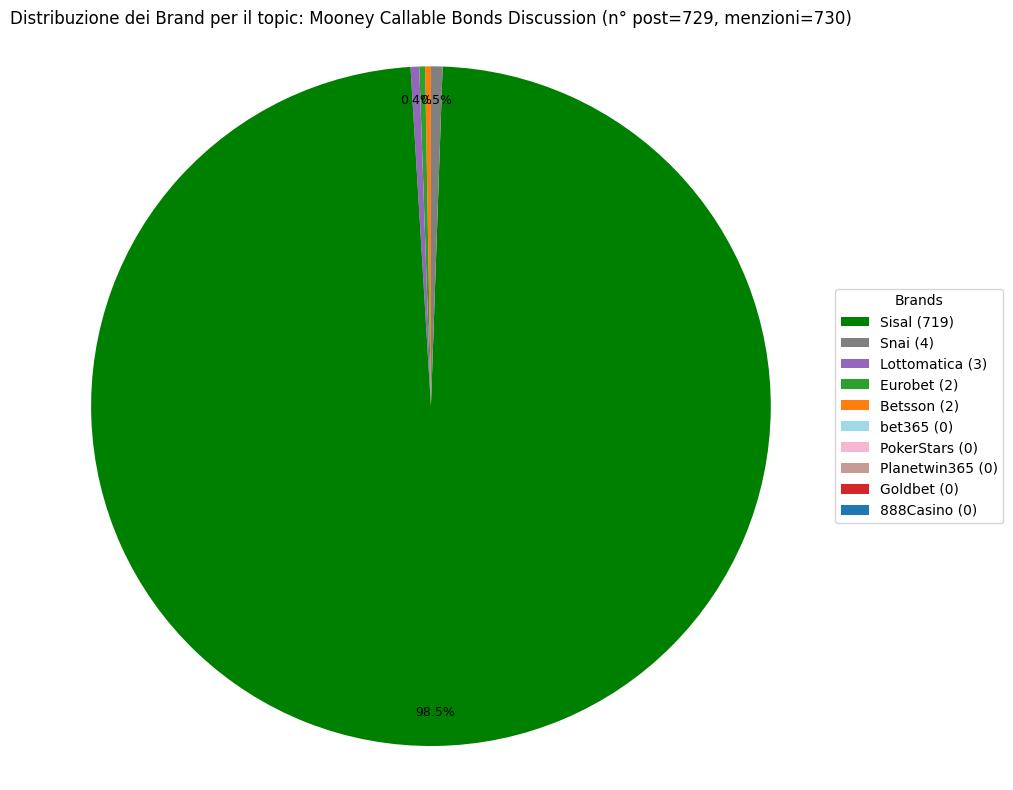

In [25]:
# Top 10 labels by total brand mentions (as before)
top_10_labels = (
    label_brand_pivot.sum(axis=1)
    .sort_values(ascending=False)
    .head(10)
    .index
)

# True post count per label (from label_counts_df)
label_totals = label_counts_df.set_index("Labels")["Count"]

# Base colors for brands + Sisal override
brand_list = list(label_brand_pivot.columns)
brand_colors = dict(zip(brand_list, plt.cm.tab20(np.linspace(0, 1, len(brand_list)))))
brand_colors["Sisal"] = "green"
brand_colors["Snai"] = "grey"


for label in top_10_labels:
    values = label_brand_pivot.loc[label].astype(float)

    if values.sum() == 0:
        continue

    fig, ax = plt.subplots(figsize=(10, 8))
    wedges, _, _ = ax.pie(
        values,
        colors=[brand_colors[b] for b in values.index],
        autopct=lambda p: f"{p:.1f}%" if p > 0.3 else "",
        startangle=90,
        pctdistance=0.9,
        textprops={"fontsize": 9}
    )

    sort_idx = np.argsort(values.values)[::-1]
    legend_labels = [f"{values.index[i]} ({int(values.iloc[i])})" for i in sort_idx]
    wedges = [wedges[i] for i in sort_idx]
    ax.legend(
        wedges,
        legend_labels,
        title="Brands",
        loc="center left",
        bbox_to_anchor=(1, 0.5)
    )

    posts_total = int(label_totals.get(label, 0))      # from label_counts_df
    mentions_total = int(values.sum())                 # from brand counting
    ax.set_title(f"Distribuzione dei Brand per il topic: {label} (n° post={posts_total}, menzioni={mentions_total})")
    ax.axis("equal")
    plt.tight_layout()

    safe_label = "".join(ch if ch.isalnum() else "_" for ch in str(label)).strip("_").lower()
    rank = top_10_labels.get_loc(label) + 1
    plt.savefig(f"pie_{rank}_{safe_label}.png", dpi=300, bbox_inches="tight")
    plt.show()

### correlation map

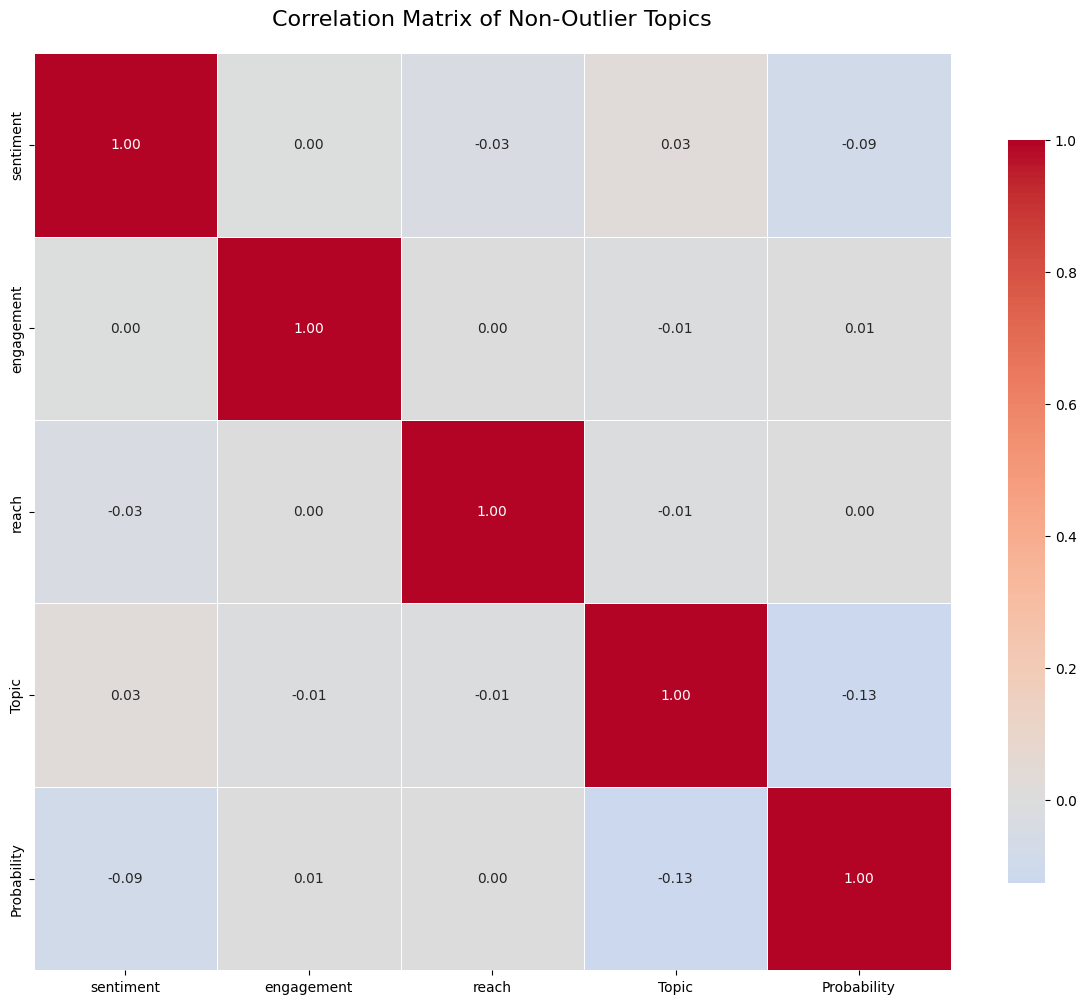

In [97]:
# Select only numeric columns from joined_df_non_outliers
numeric_cols = joined_df_non_outliers.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_cols.corr()

# Create a larger figure for better readability
plt.figure(figsize=(12, 10))

# Create heatmap
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f',
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

plt.title('Correlation Matrix of Non-Outlier Topics', fontsize=16, pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix_non_outliers.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
joined_df_outliers.head(20)

In [7]:
# Count all Paese values for topics == -1
paese_counts = joined_df_outliers["Paese"].value_counts()
paese_counts

Paese
Italy          24993
France          1959
Germany          761
India            688
Turkey           686
               ...  
Puerto Rico        1
Isle Of Man        1
San Marino         1
Thailand           1
Belarus            1
Name: count, Length: 101, dtype: int64

## Sisal prova

In [ ]:
sisal_df = joined_df[
    joined_df["Brand"].str.contains("Sisal", case=False, na=False)
].copy()

In [ ]:
sisal_df = joined_df[
    joined_df["Brand"].str.contains(r"(^|,)\s*Sisal\s*(,|$)", case=False, na=False)
].copy()


C:\Users\andre\AppData\Local\Temp\ipykernel_3692\2716389451.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  joined_df["Brand"].str.contains(r"(^|,)\s*Sisal\s*(,|$)", case=False, na=False)


Non useremo regex perche cerca solo la string sisal mentre il primo contains, cerca qualsiasi match con sisal quindi nel nostro caso accorperà anche sisaltipster che è cio che ci interessa fare ed inoltre è una soluzione piu semplice ed elegante

In [ ]:
topic_counts_df = (
    sisal_df.loc[sisal_df["Topic"] != -1, ["Topic", "Labels"]]
    .assign(count=1)
    .groupby(["Topic", "Labels"], as_index=False)["count"]
    .sum()
    .sort_values("count", ascending=False)
)
topic_counts_df

Topic                                     Labels  count
0       0                   Scommesse e Quote Calcio   4479
1       1            Online Slot Casino Bonuses 2025   3479
2       2               Betting and Gambling Content    859
7       7           Mooney Callable Bonds Discussion    719
3       3         Ripopolamento aree interne Sicilia    330
4       4      Premier League Match Predictions 2025    263
11     11                 NBA Live Streaming Matches    260
8       8             Gioco Plinko nei Casinò Online    162
19     19        X Factor 2025 Finalists Predictions    150
9       9             Coppa d'Africa 2025 Pronostici     89
13     13  Garlasco Case Investigations and Finances     66
6       6         Lottomatica Stock Discussion Forum     51
18     18             Siti Scommesse Non AAMS Italia     32
5       5         Borse Europee e Mercati Finanziari     15
16     16                  Online Betting and Gaming     14
15     15       Futuro dell'intrattenimento digitale     10
10     10                   Horse Racing Events 2025      4
17     17           Illegal Gambling Market Research      3
12     12         Australian Football Betting Quotes      1
14     14                  NBA Betting Odds Analysis      1

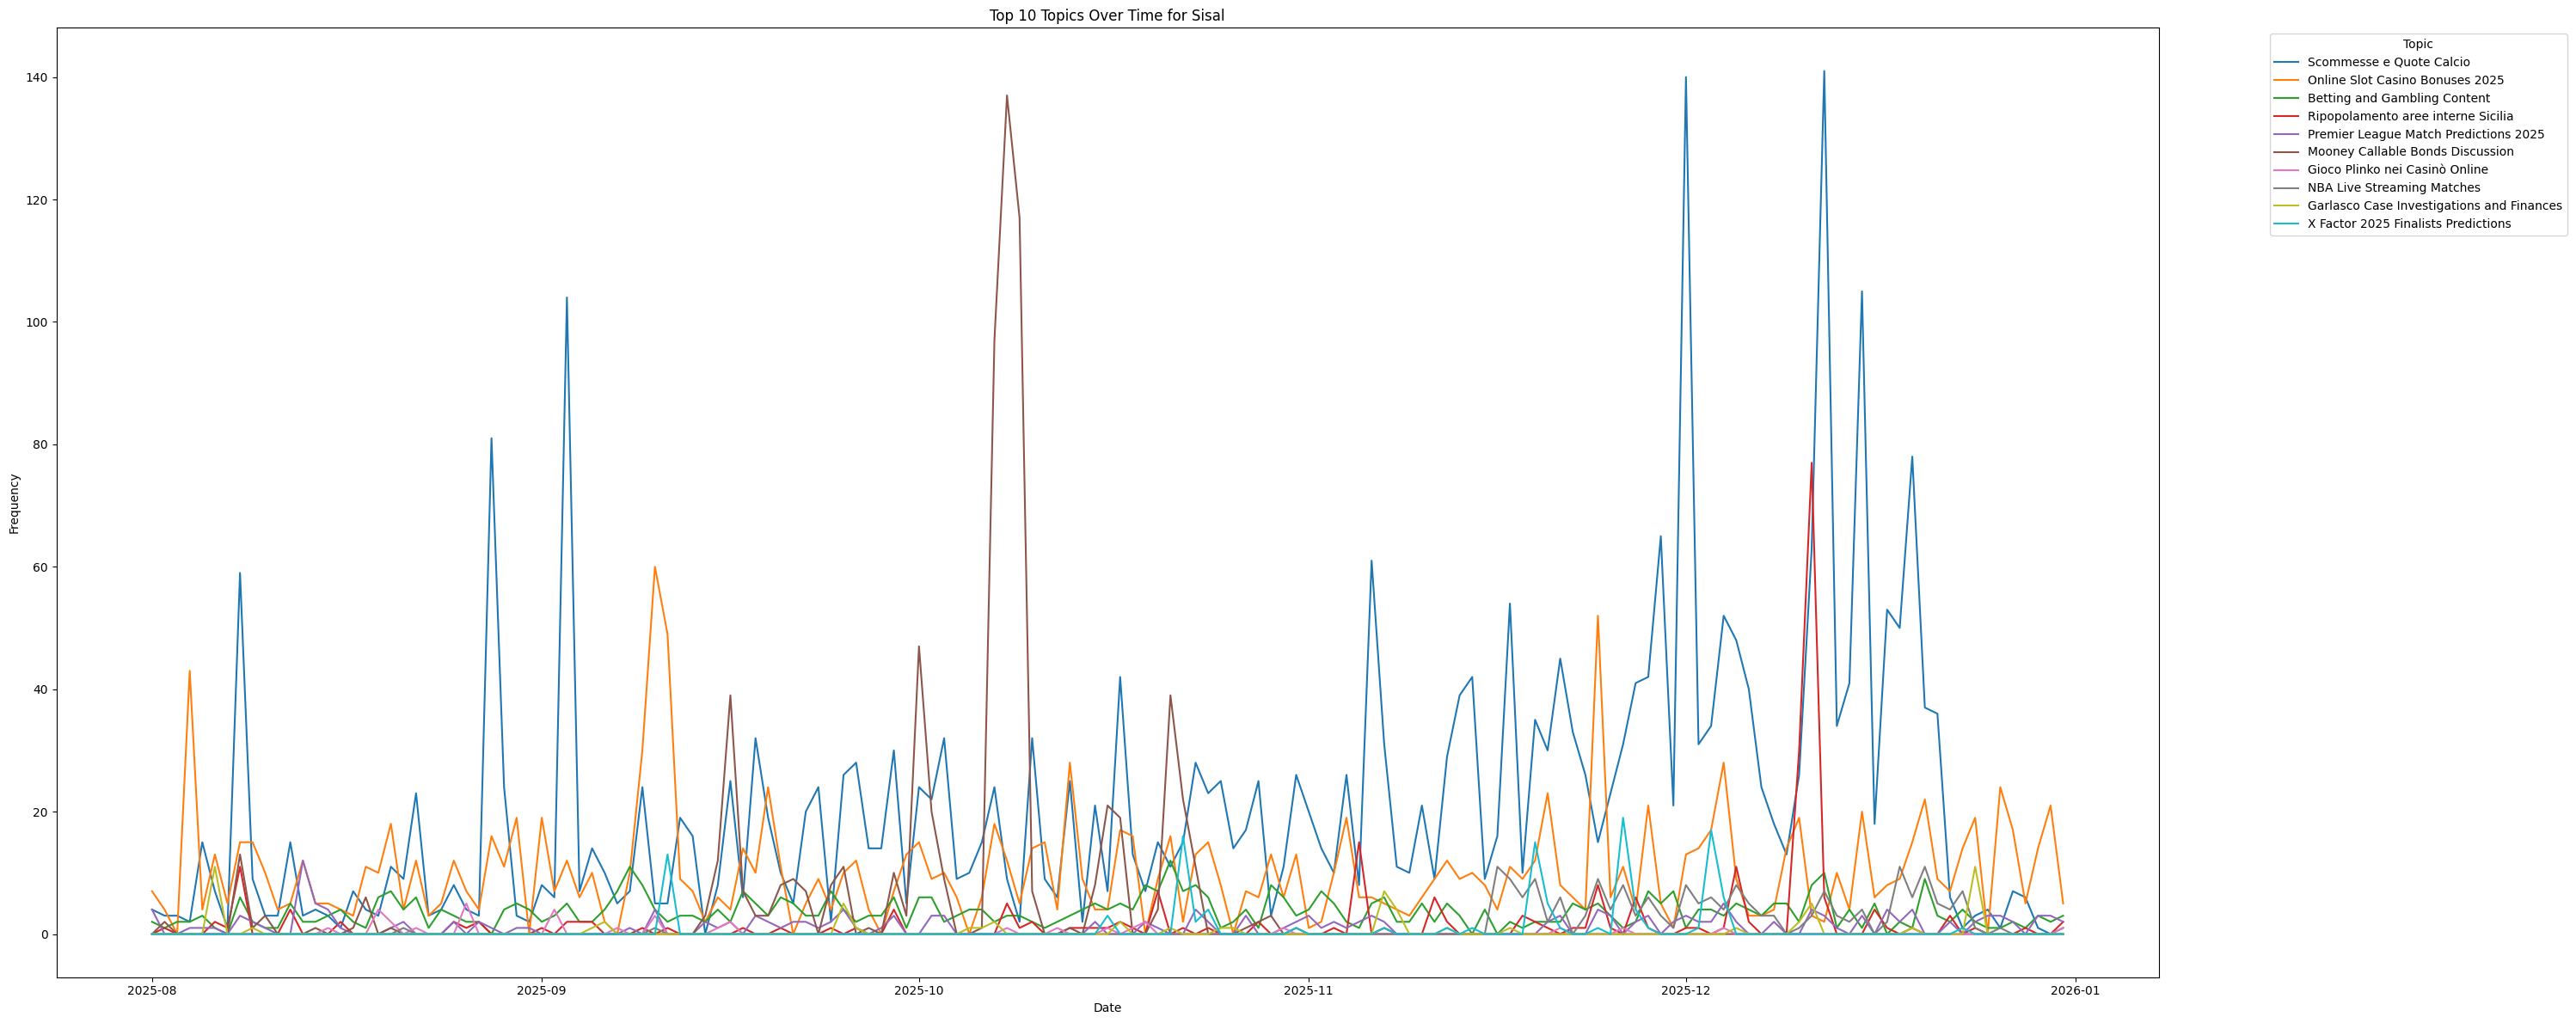

In [34]:
# Exclude -1 and get top topics by frequency
top_topics = sisal_df.loc[sisal_df["Topic"] != -1, "Topic"].value_counts().head(10).index

# Topic -> label mapping
topic_labels = (
    sisal_df.loc[sisal_df["Topic"].isin(top_topics), ["Topic", "Labels"]]
    .drop_duplicates("Topic")
    .set_index("Topic")["Labels"]
)

# Count by date and topic
counts = (
    sisal_df[sisal_df["Topic"].isin(top_topics)]
    .groupby([sisal_df["published_date"].dt.date, "Topic"])
    .size()
    .unstack(fill_value=0)
)

# Plot with label names
ax = counts.plot(figsize=(30, 12))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [topic_labels.get(int(t), t) for t in labels],
          title="Topic", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.title("Top 10 Topics Over Time for Sisal")
plt.tight_layout()
plt.show()

## Sisal

### sentiment count sisal

In [ ]:
positive_sentiment_count = df1[
    df1["Brand"].str.contains("Sisal", case=False, na=False)
]["sentiment"].eq(1).sum()

positive_sentiment_count

4236

In [ ]:
neutral_sentiment_count_sisal = df1[
    df1["Brand"].str.contains("Sisal", case=False, na=False) & df1["sentiment"].eq(0)
].shape[0]

neutral_sentiment_count_sisal

14667

In [5]:
sisal_df = joined_df[
    joined_df["Brand"].str.contains("Sisal", case=False, na=False)
].copy()

### topic counts

In [54]:
topic_counts_sisal = (
    sisal_df.loc[sisal_df["Topic"] != -1, ["Topic", "Labels"]]
    .assign(count=1)
    .groupby(["Topic", "Labels"], as_index=False)["count"]
    .sum()
    .sort_values("count", ascending=False)
)
topic_counts_sisal


Topic                                     Labels  count
0       0                   Scommesse e Quote Calcio   4866
1       1            Online Slot Casino Bonuses 2025   3485
2       2               Betting and Gambling Content    873
7       7           Mooney Callable Bonds Discussion    719
3       3         Ripopolamento aree interne Sicilia    330
4       4      Premier League Match Predictions 2025    263
11     11                 NBA Live Streaming Matches    260
8       8             Gioco Plinko nei Casinò Online    162
19     19        X Factor 2025 Finalists Predictions    150
9       9             Coppa d'Africa 2025 Pronostici     89
13     13  Garlasco Case Investigations and Finances     66
6       6         Lottomatica Stock Discussion Forum     51
18     18             Siti Scommesse Non AAMS Italia     32
5       5         Borse Europee e Mercati Finanziari     16
16     16                  Online Betting and Gaming     14
15     15       Futuro dell'intrattenimento digitale     10
10     10                   Horse Racing Events 2025      4
17     17           Illegal Gambling Market Research      3
12     12         Australian Football Betting Quotes      1
14     14                  NBA Betting Odds Analysis      1

In [15]:
dfi.export(
    topic_counts_sisal,
    "topic_counts_sisal.png",
    table_conversion= "chrome"
)

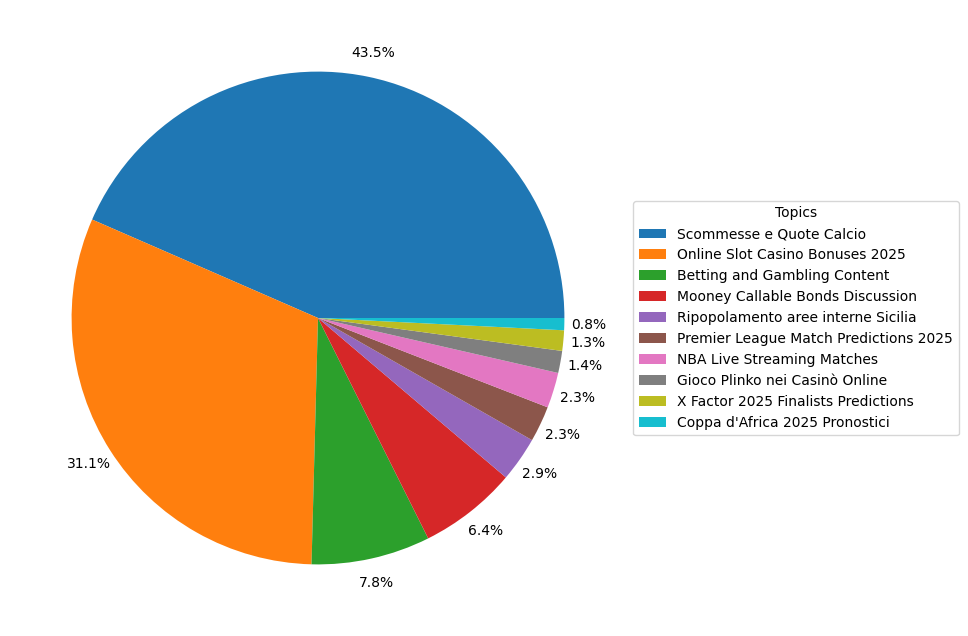

In [59]:
# Create a pie chart with labels and counts (top 10 topics)
fig, ax = plt.subplots(figsize=(12, 8))

wedges, texts, autotexts = ax.pie(
    topic_counts_sisal.head(10)['count'],
    autopct='%1.1f%%',
    pctdistance=1.1,
    textprops={'fontsize': 10}
)

ax.legend(
    wedges,
    topic_counts_sisal.head(10)['Labels'],
    title="Topics",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)


plt.savefig('sisal_pie_chart.png', dpi=300, bbox_inches='tight')
plt.show()

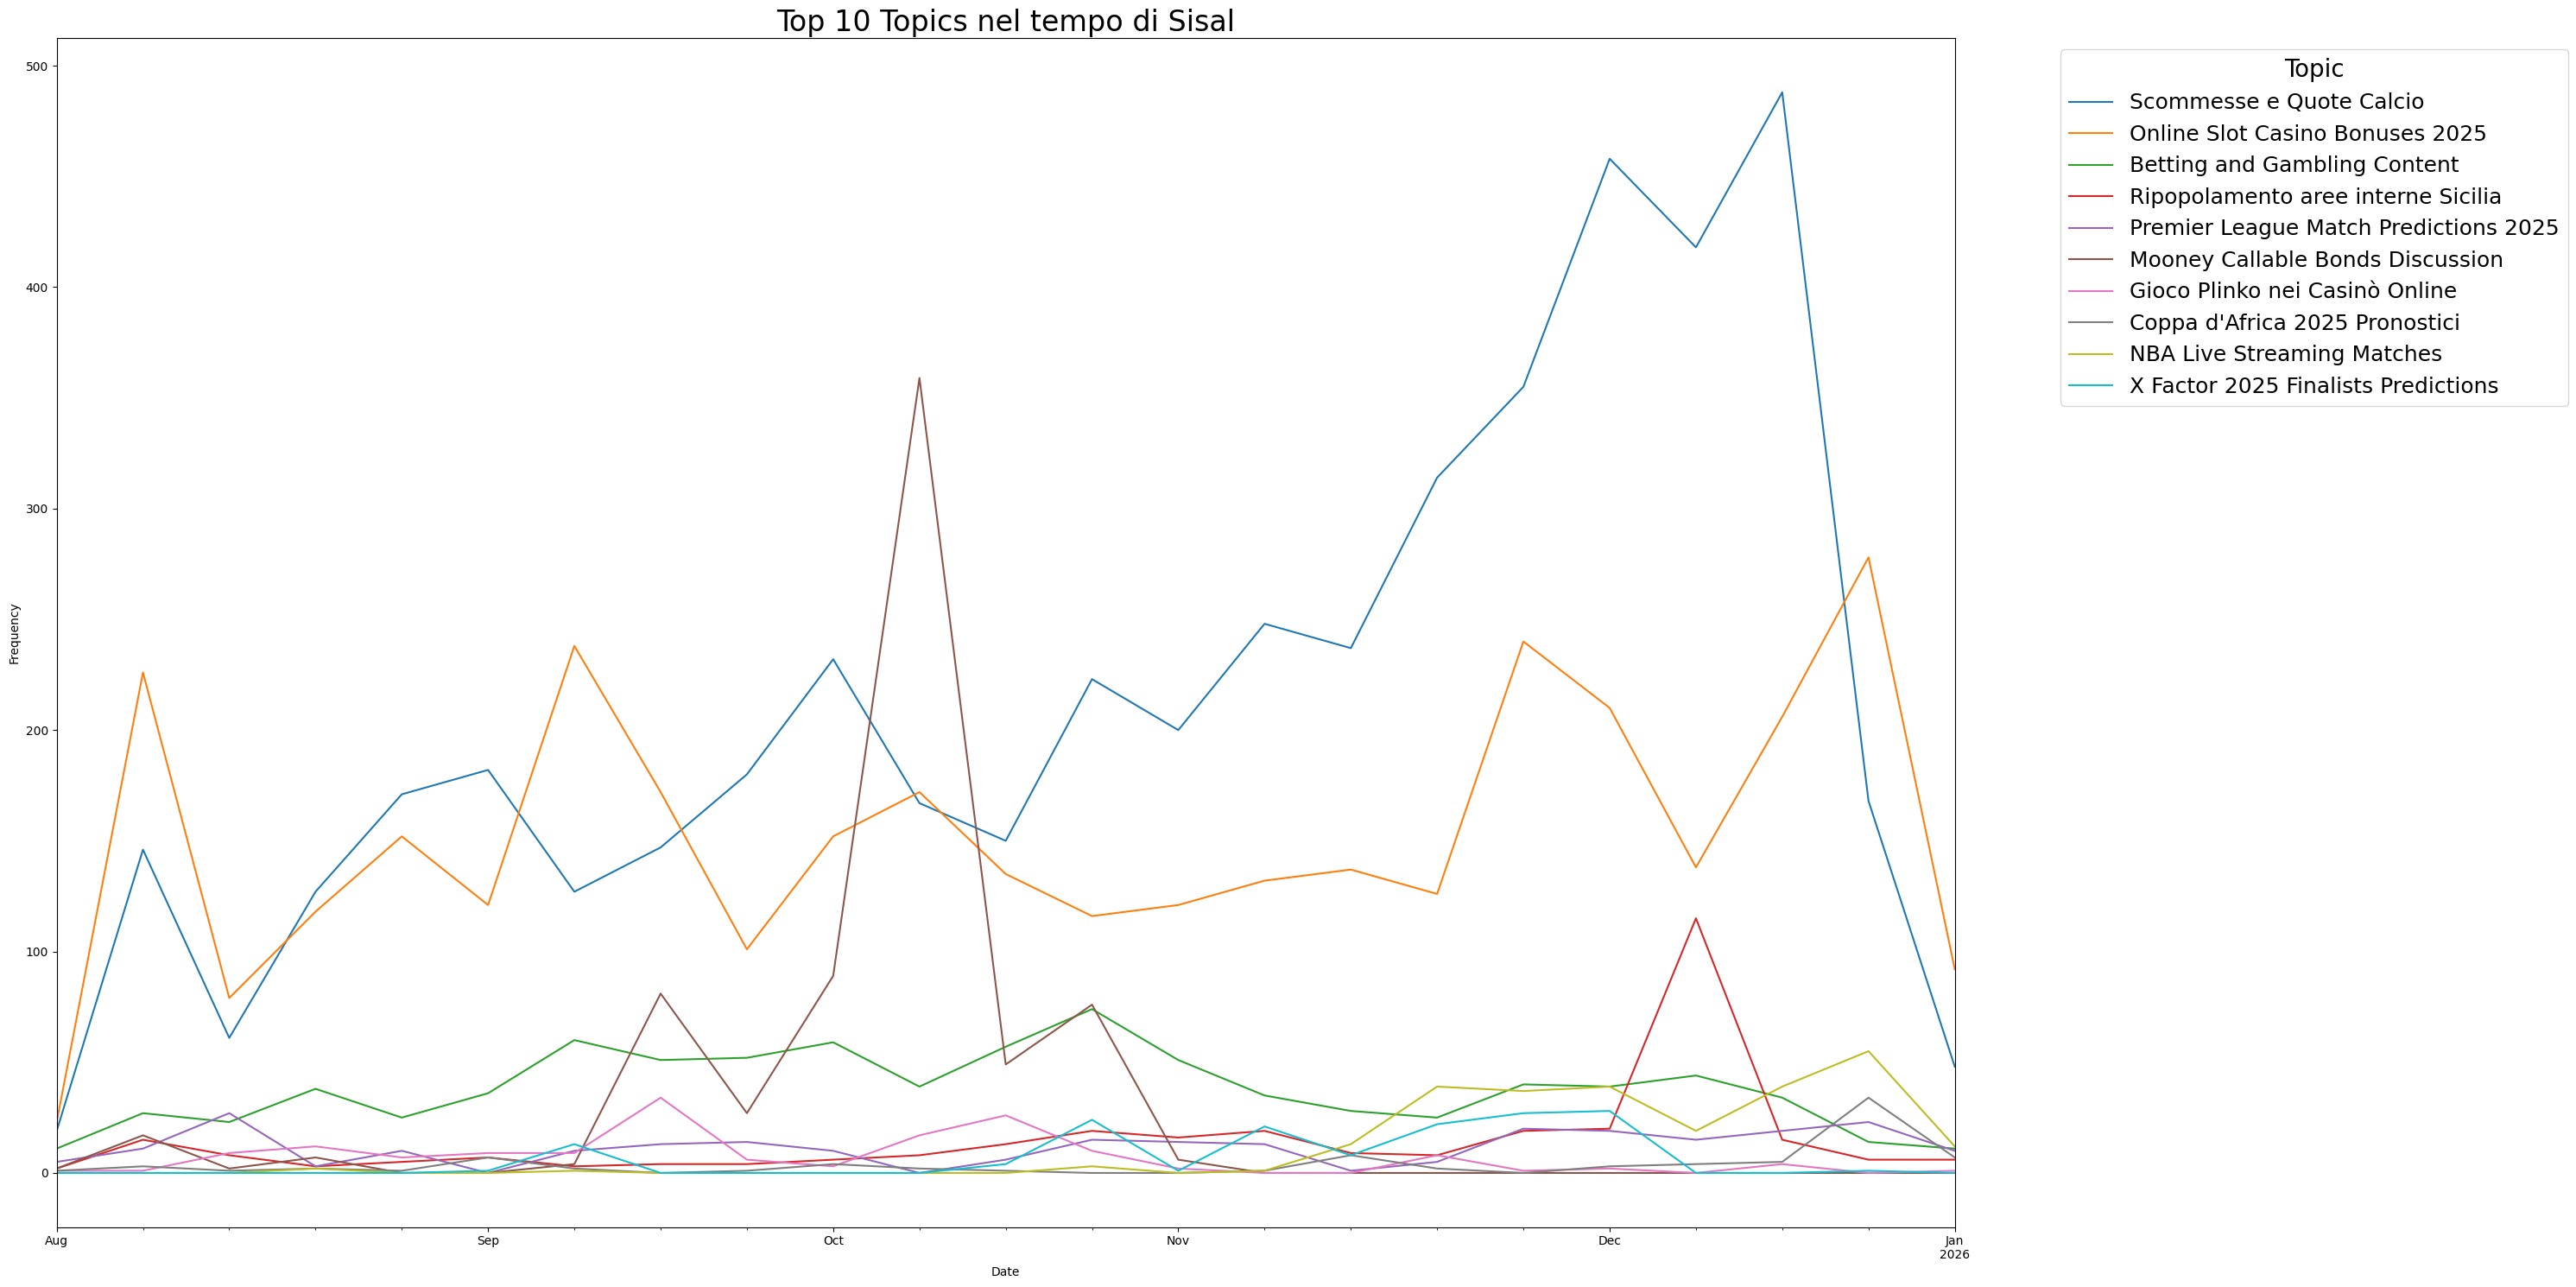

In [17]:
# Exclude -1 and get top topics by frequency
top_topics = sisal_df.loc[sisal_df["Topic"] != -1, "Topic"].value_counts().head(10).index

# Topic -> label mapping
topic_labels = (
    sisal_df.loc[sisal_df["Topic"].isin(top_topics), ["Topic", "Labels"]]
    .drop_duplicates("Topic")
    .set_index("Topic")["Labels"]
)

# Count by date and topic
sisal_df["published_date"] = pd.to_datetime(sisal_df["published_date"], errors="coerce")
counts = (
    sisal_df[sisal_df["Topic"].isin(top_topics)]
    .groupby([sisal_df["published_date"].dt.date, "Topic"])
    .size()
    .unstack(fill_value=0)
)

# smooth: weekly resample + 1-week rolling mean
counts.index = pd.to_datetime(counts.index)
counts = counts.resample("W").sum().rolling(1, min_periods=1).mean()

# Plot with label names
ax = counts.plot(figsize=(30, 15))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [topic_labels.get(int(t), t) for t in labels],
          title="Topic", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=18, title_fontsize=20)
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.title("Top 10 Topics nel tempo di Sisal", fontsize=24)
plt.tight_layout()
plt.savefig('sisal_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

### Sentiment per topic

In [7]:
sisal_df1 = sisal_df[sisal_df["Topic"] != -1].copy()

sentiment_counts_sisal = (
    sisal_df1[sisal_df1["sentiment"].isin([-1, 1])]
    .groupby(["Labels", "sentiment"])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=[1, -1], fill_value=0)
    .rename(columns={1: "Positivo", -1: "Negativo"})
    .reset_index()
    .sort_values(["Positivo", "Negativo"], ascending=[False, False])
    .reset_index(drop=True)
)

sentiment_counts_sisal

dfi.export(
    sentiment_counts_sisal,
    "sentiment_counts_sisal.png",
    table_conversion= "chrome"
)

NameError: name 'sisal_df' is not defined

## Snai

In [56]:
snai_df = joined_df[
    joined_df["Brand"].str.contains("Snai", case=False, na=False)
].copy()

In [57]:
topic_counts_snai = (
    snai_df.loc[snai_df["Topic"] != -1, ["Topic", "Labels"]]
    .assign(count=1)
    .groupby(["Topic", "Labels"], as_index=False)["count"]
    .sum()
    .sort_values("count", ascending=False)
)
topic_counts_snai

Topic                                     Labels  count
0       0                   Scommesse e Quote Calcio  19493
1       1            Online Slot Casino Bonuses 2025   6032
3       3         Ripopolamento aree interne Sicilia   1070
2       2               Betting and Gambling Content   1055
4       4      Premier League Match Predictions 2025    694
10     10                   Horse Racing Events 2025    525
12     12         Australian Football Betting Quotes    394
9       9             Coppa d'Africa 2025 Pronostici    368
14     14                  NBA Betting Odds Analysis    350
16     16                  Online Betting and Gaming    188
13     13  Garlasco Case Investigations and Finances    174
17     17           Illegal Gambling Market Research    160
8       8             Gioco Plinko nei Casinò Online     98
19     19        X Factor 2025 Finalists Predictions     68
6       6         Lottomatica Stock Discussion Forum     28
18     18             Siti Scommesse Non AAMS Italia     23
11     11                 NBA Live Streaming Matches     17
5       5         Borse Europee e Mercati Finanziari     14
15     15       Futuro dell'intrattenimento digitale      8
7       7           Mooney Callable Bonds Discussion      4

In [20]:
dfi.export(
    topic_counts_snai,
    "topic_counts_snai.png",
    table_conversion= "chrome"
)

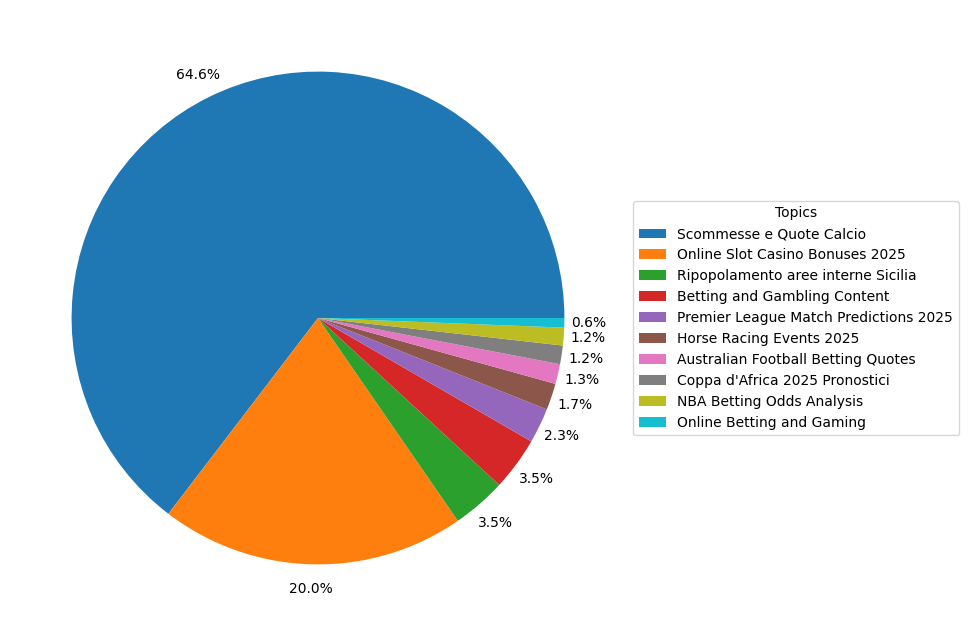

In [60]:
# Create a pie chart with labels and counts (top 10 topics)
fig, ax = plt.subplots(figsize=(12, 8))

wedges, texts, autotexts = ax.pie(
    topic_counts_snai.head(10)['count'],
    autopct='%1.1f%%',
    pctdistance=1.1,
    textprops={'fontsize': 10}
)

ax.legend(
    wedges,
    topic_counts_snai.head(10)['Labels'],
    title="Topics",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)


plt.savefig('snai_pie_chart.png', dpi=300, bbox_inches='tight')
plt.show()

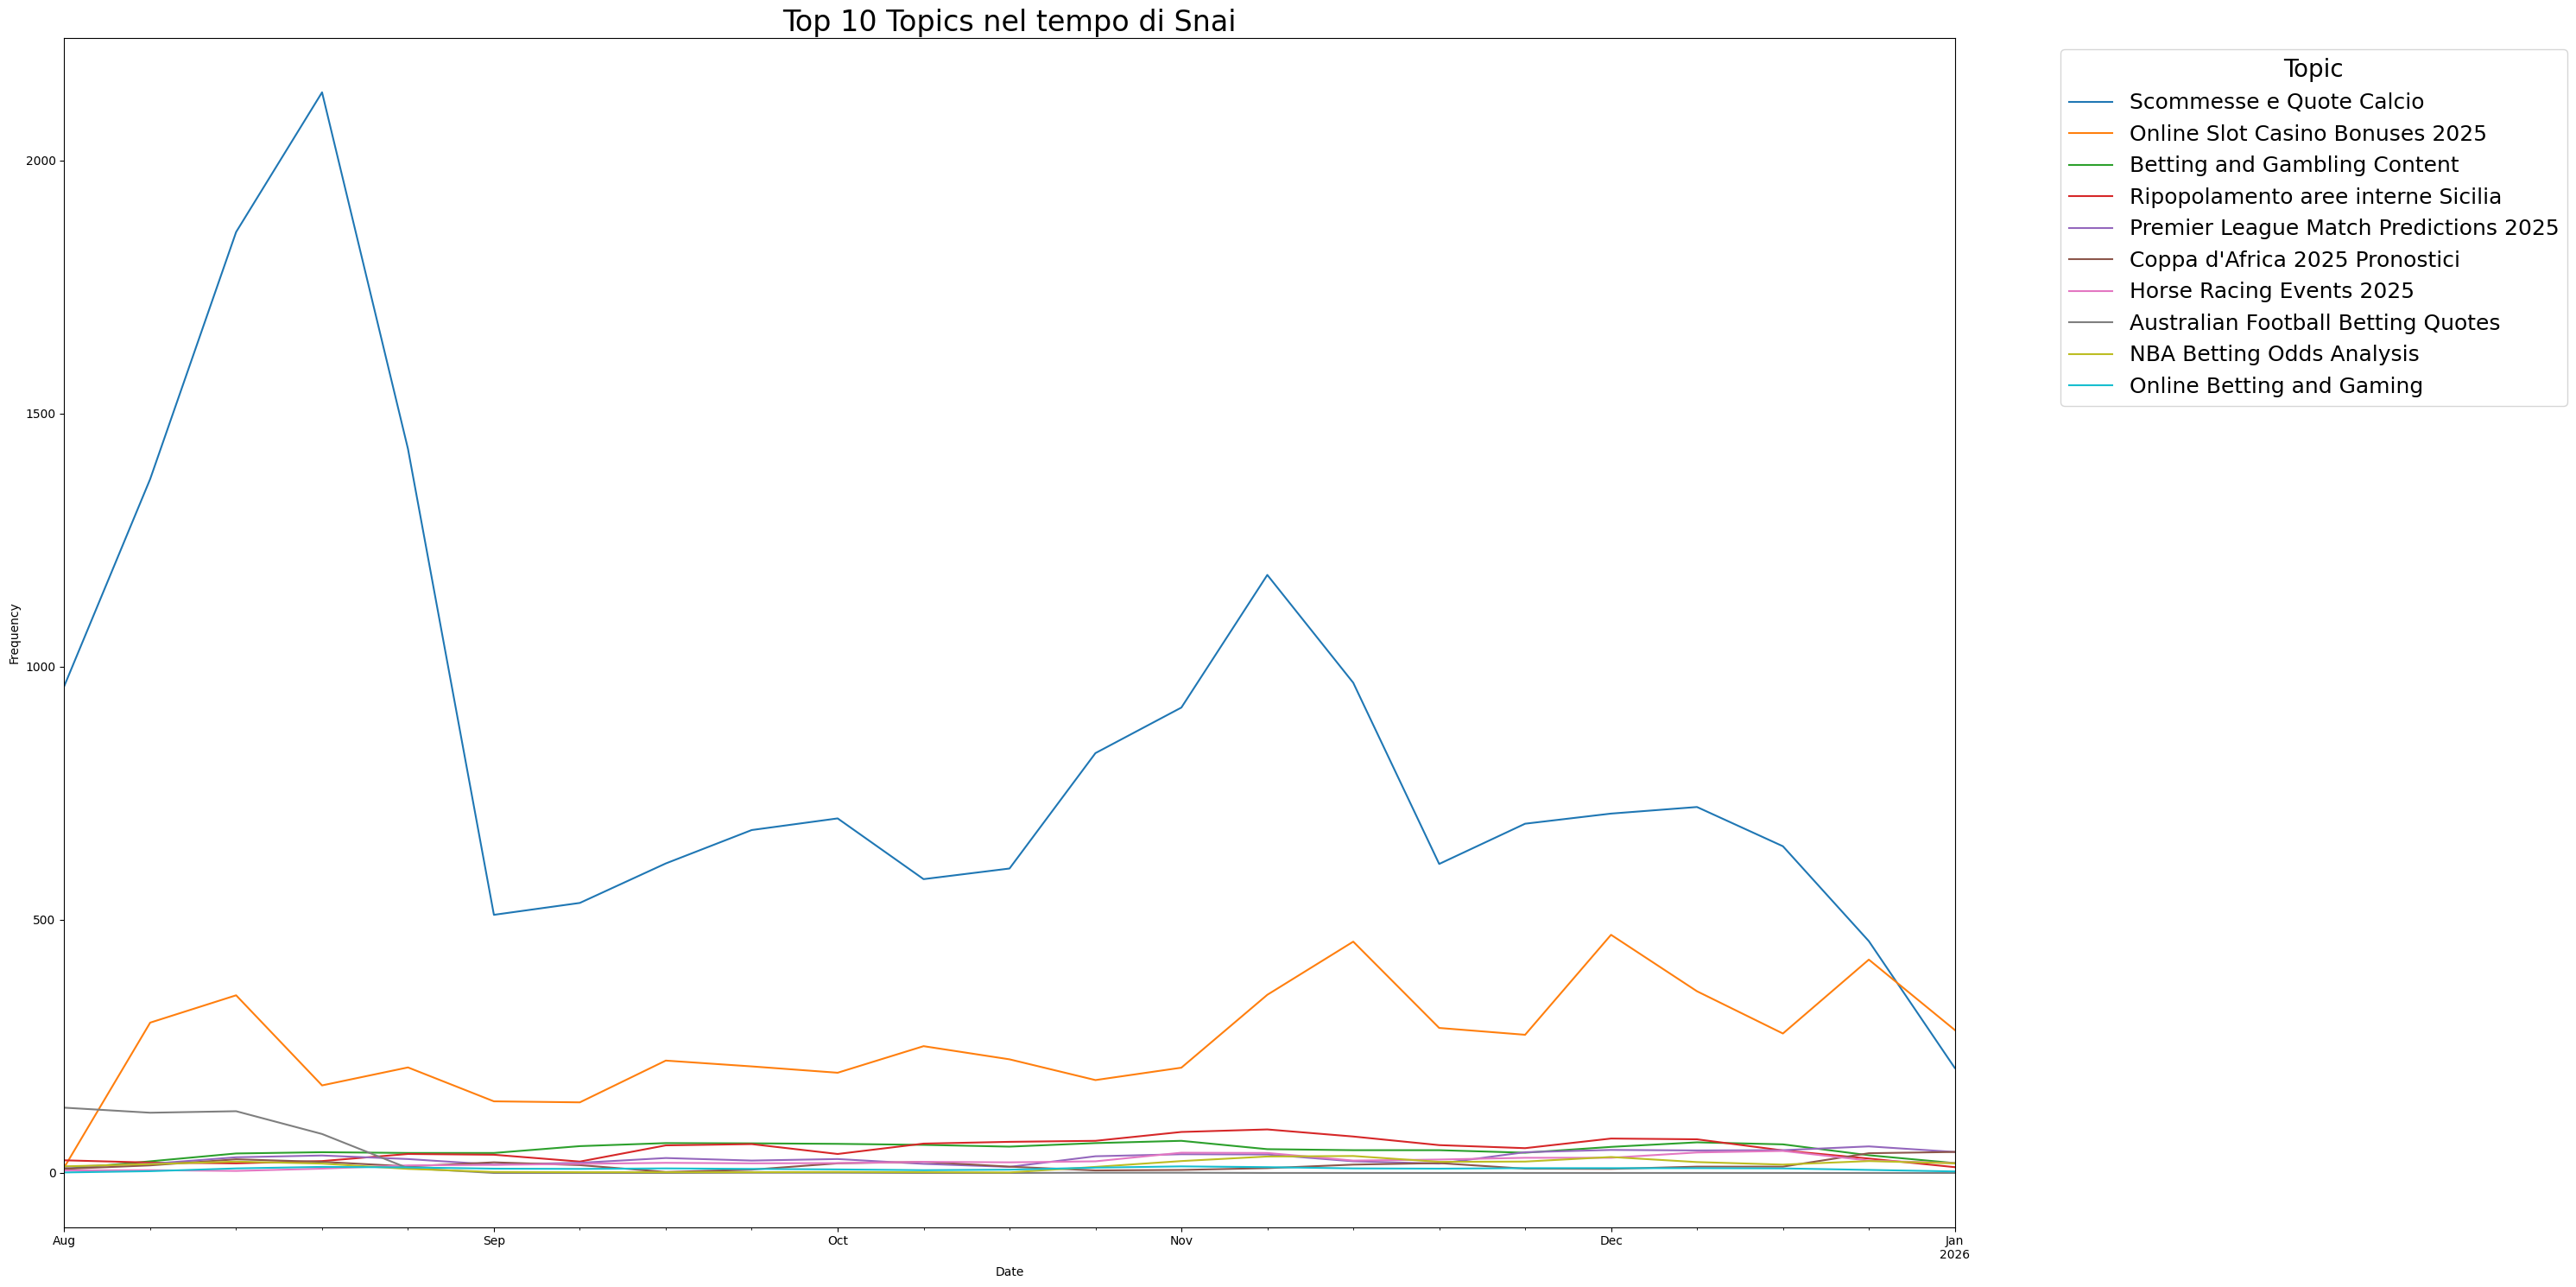

In [22]:
# Exclude -1 and get top topics by frequency
top_topics = snai_df.loc[snai_df["Topic"] != -1, "Topic"].value_counts().head(10).index

# Topic -> label mapping
topic_labels = (
    snai_df.loc[snai_df["Topic"].isin(top_topics), ["Topic", "Labels"]]
    .drop_duplicates("Topic")
    .set_index("Topic")["Labels"]
)

# Count by date and topic
snai_df["published_date"] = pd.to_datetime(snai_df["published_date"], errors="coerce")
counts = (
    snai_df[snai_df["Topic"].isin(top_topics)]
    .groupby([snai_df["published_date"].dt.date, "Topic"])
    .size()
    .unstack(fill_value=0)
)

# smooth: weekly resample + 3-week rolling mean
counts.index = pd.to_datetime(counts.index)
counts = counts.resample("W").sum().rolling(2, min_periods=1).mean()

# Plot with label names
ax = counts.plot(figsize=(30, 15))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [topic_labels.get(int(t), t) for t in labels],
          title="Topic", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=18, title_fontsize=20)
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.title("Top 10 Topics nel tempo di Snai", fontsize=24)
plt.tight_layout()
plt.savefig('snai_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

## Lottomatica

In [61]:
lottomatica_df = joined_df[
    joined_df["Brand"].str.contains("Lottomatica", case=False, na=False)
].copy()

In [62]:
topic_counts_lottomatica = (
    lottomatica_df.loc[lottomatica_df["Topic"] != -1, ["Topic", "Labels"]]
    .assign(count=1)
    .groupby(["Topic", "Labels"], as_index=False)["count"]
    .sum()
    .sort_values("count", ascending=False)
)
topic_counts_lottomatica

Topic                                     Labels  count
1       1            Online Slot Casino Bonuses 2025   2908
0       0                   Scommesse e Quote Calcio   1927
5       5         Borse Europee e Mercati Finanziari   1464
6       6         Lottomatica Stock Discussion Forum    965
3       3         Ripopolamento aree interne Sicilia    463
2       2               Betting and Gambling Content    331
4       4      Premier League Match Predictions 2025    284
9       9             Coppa d'Africa 2025 Pronostici    102
8       8             Gioco Plinko nei Casinò Online     93
11     11                 NBA Live Streaming Matches     64
15     15       Futuro dell'intrattenimento digitale     31
13     13  Garlasco Case Investigations and Finances     15
18     18             Siti Scommesse Non AAMS Italia     14
10     10                   Horse Racing Events 2025     14
16     16                  Online Betting and Gaming     10
19     19        X Factor 2025 Finalists Predictions      8
17     17           Illegal Gambling Market Research      6
14     14                  NBA Betting Odds Analysis      4
7       7           Mooney Callable Bonds Discussion      3
12     12         Australian Football Betting Quotes      2

In [25]:
dfi.export(
    topic_counts_lottomatica,
    "topic_counts_lottomatica.png",
    table_conversion= "chrome"
)

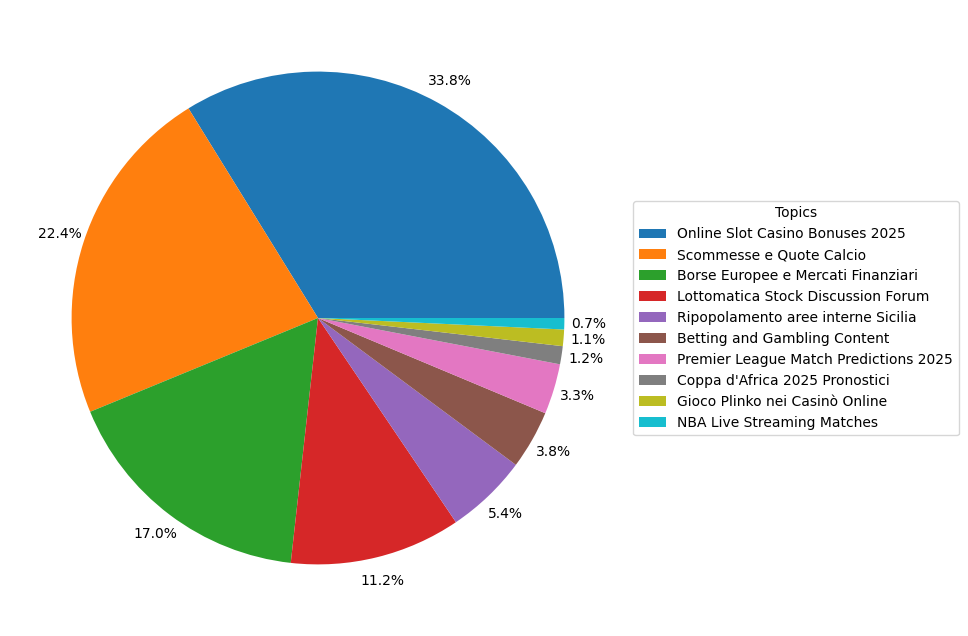

In [93]:
# Create a pie chart with labels and counts (top 10 topics)
fig, ax = plt.subplots(figsize=(12, 8))

wedges, texts, autotexts = ax.pie(
    topic_counts_lottomatica.head(10)['count'],
    autopct='%1.1f%%',
    pctdistance=1.1,
    textprops={'fontsize': 10}
)

ax.legend(
    wedges,
    topic_counts_lottomatica.head(10)['Labels'],
    title="Topics",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)


plt.savefig('lottomatica_pie_chart.png', dpi=300, bbox_inches='tight')
plt.show()

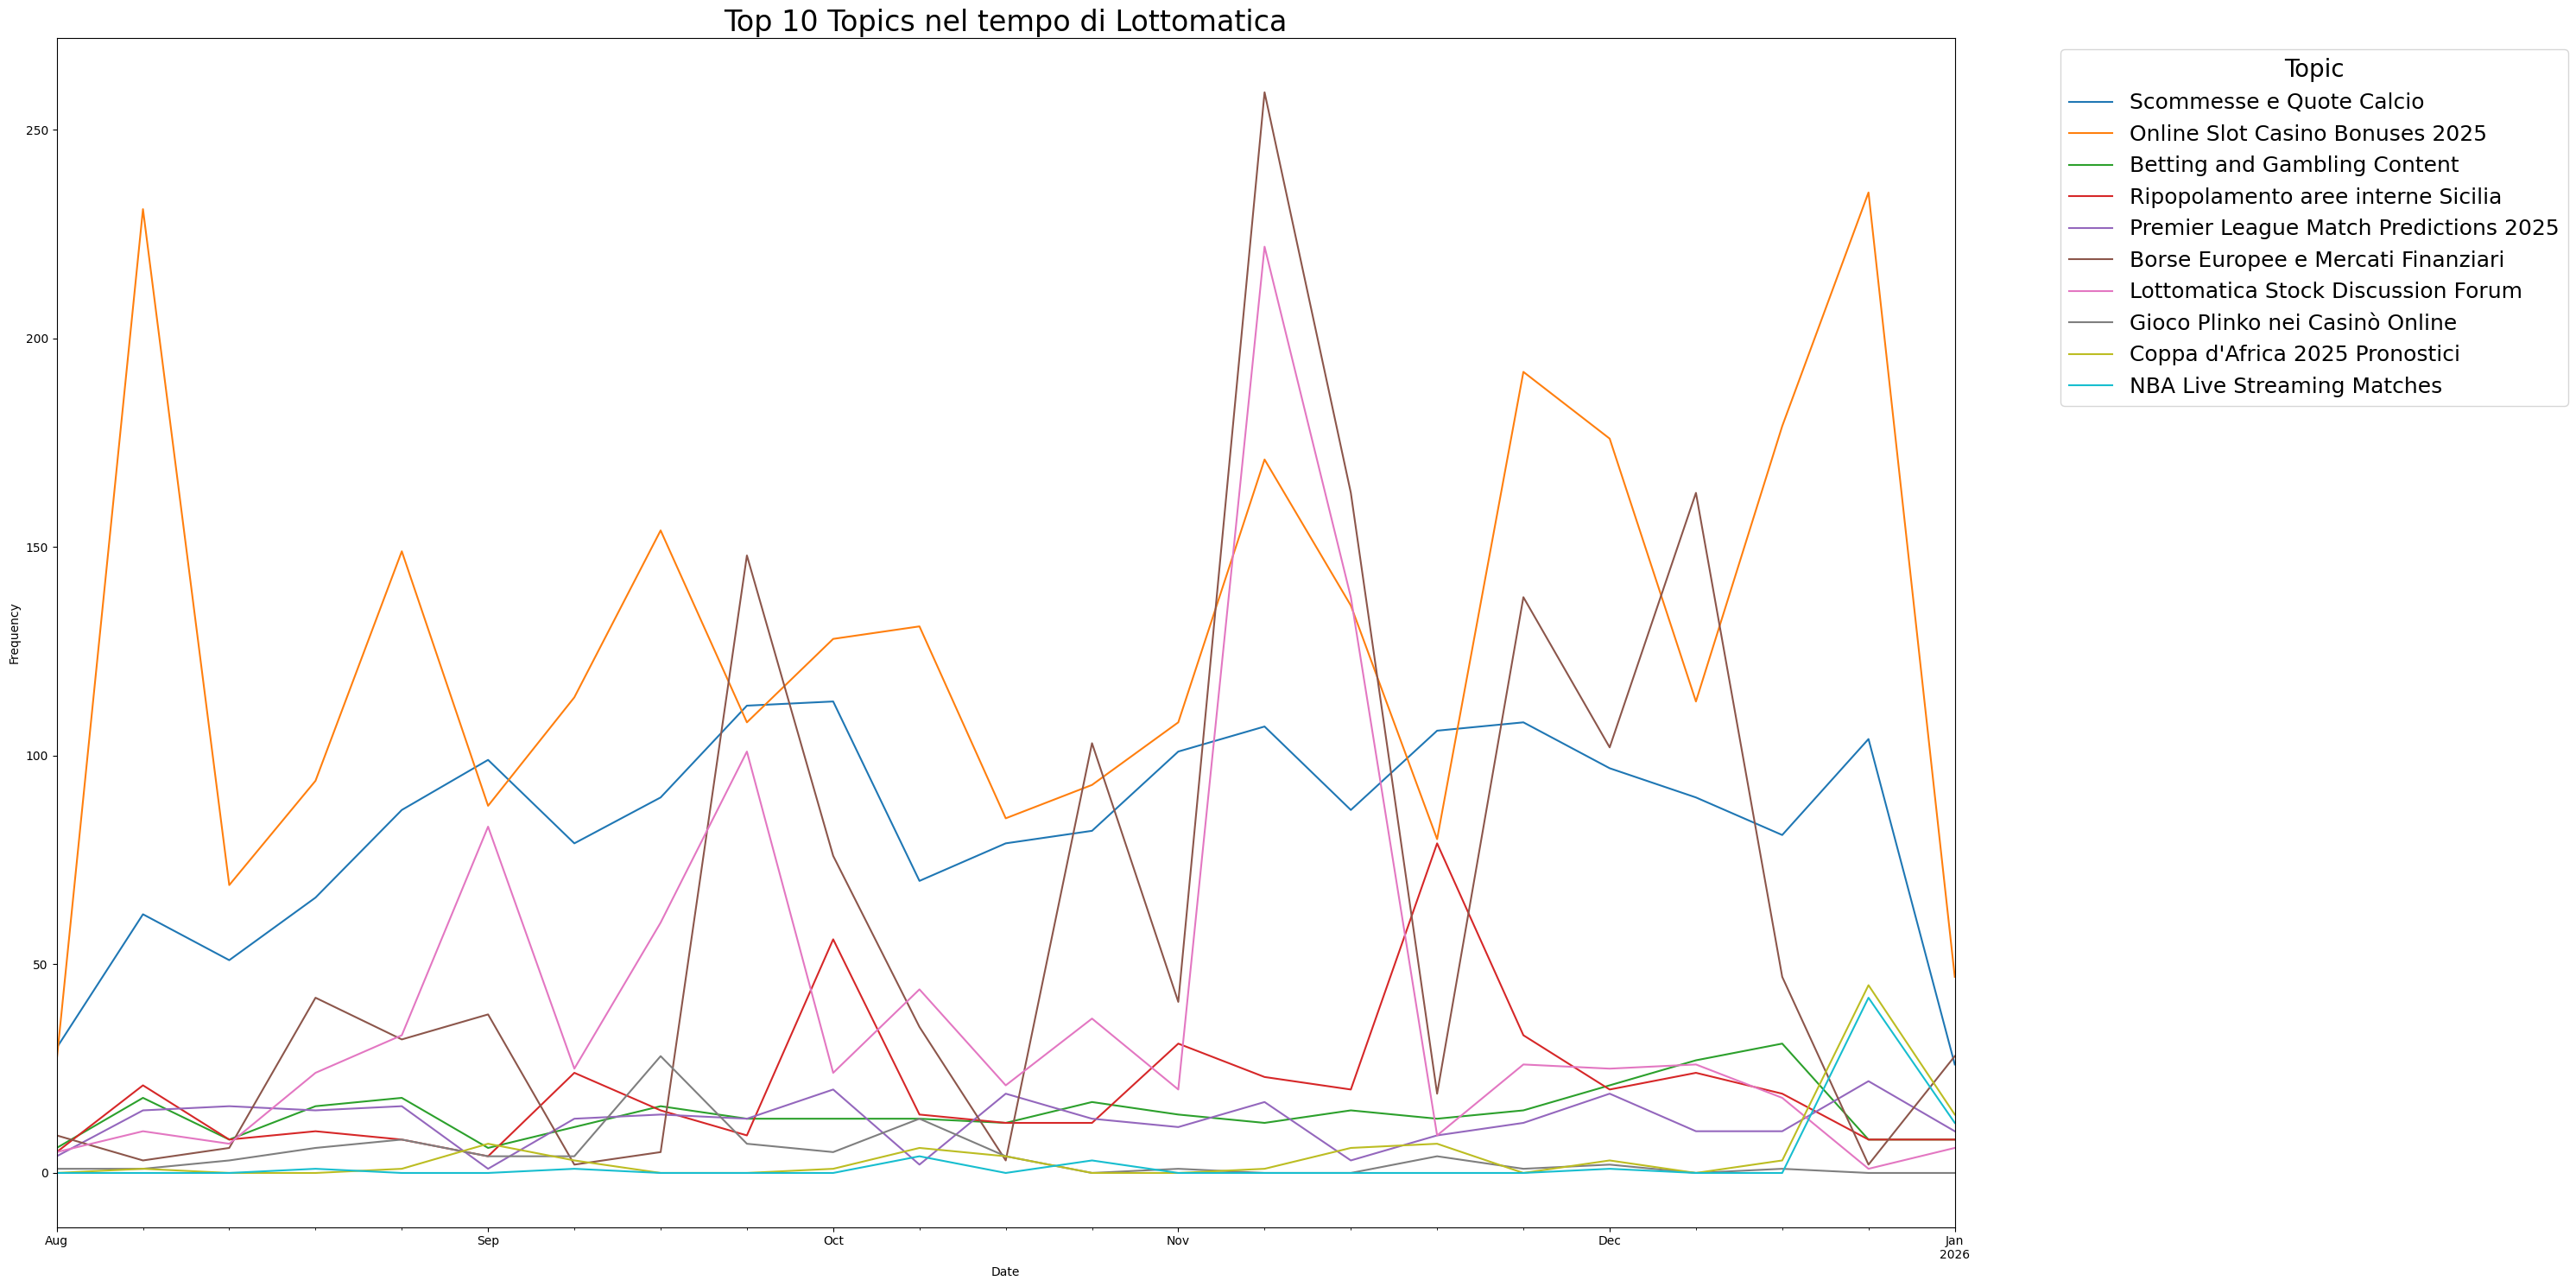

In [27]:
# Exclude -1 and get top topics by frequency
top_topics = lottomatica_df.loc[lottomatica_df["Topic"] != -1, "Topic"].value_counts().head(10).index

# Topic -> label mapping
topic_labels = (
    lottomatica_df.loc[lottomatica_df["Topic"].isin(top_topics), ["Topic", "Labels"]]
    .drop_duplicates("Topic")
    .set_index("Topic")["Labels"]
)

# Count by date and topic
lottomatica_df["published_date"] = pd.to_datetime(lottomatica_df["published_date"], errors="coerce")
counts = (
    lottomatica_df[lottomatica_df["Topic"].isin(top_topics)]
    .groupby([lottomatica_df["published_date"].dt.date, "Topic"])
    .size()
    .unstack(fill_value=0)
)

# smooth: weekly resample + 1-week rolling mean
counts.index = pd.to_datetime(counts.index)
counts = counts.resample("W").sum().rolling(1, min_periods=1).mean()

# Plot with label names
ax = counts.plot(figsize=(30, 15))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [topic_labels.get(int(t), t) for t in labels],
          title="Topic", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=18, title_fontsize=20)
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.title("Top 10 Topics nel tempo di Lottomatica", fontsize=24)
plt.tight_layout()
plt.savefig('lottomatica_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

## bet365

In [8]:
bet365_df = joined_df[
    joined_df["Brand"].str.contains("bet365", case=False, na=False)
].copy()

In [9]:
topic_counts_bet365 = (
    bet365_df.loc[bet365_df["Topic"] != -1, ["Topic", "Labels"]]
    .assign(count=1)
    .groupby(["Topic", "Labels"], as_index=False)["count"]
    .sum()
    .sort_values("count", ascending=False)
)
topic_counts_bet365

Topic                                     Labels  count
0       0                   Scommesse e Quote Calcio   6871
1       1            Online Slot Casino Bonuses 2025    948
4       4      Premier League Match Predictions 2025    461
2       2               Betting and Gambling Content    352
10     11                 NBA Live Streaming Matches    266
7       8             Gioco Plinko nei Casinò Online    193
17     18             Siti Scommesse Non AAMS Italia    180
8       9             Coppa d'Africa 2025 Pronostici     96
13     14                  NBA Betting Odds Analysis     37
3       3         Ripopolamento aree interne Sicilia     25
15     16                  Online Betting and Gaming     15
6       6         Lottomatica Stock Discussion Forum     10
9      10                   Horse Racing Events 2025      4
5       5         Borse Europee e Mercati Finanziari      4
11     12         Australian Football Betting Quotes      3
14     15       Futuro dell'intrattenimento digitale      2
18     19        X Factor 2025 Finalists Predictions      2
12     13  Garlasco Case Investigations and Finances      1
16     17           Illegal Gambling Market Research      1

In [30]:
dfi.export(
    topic_counts_bet365,
    "topic_counts_bet365.png",
    table_conversion= "chrome"
)

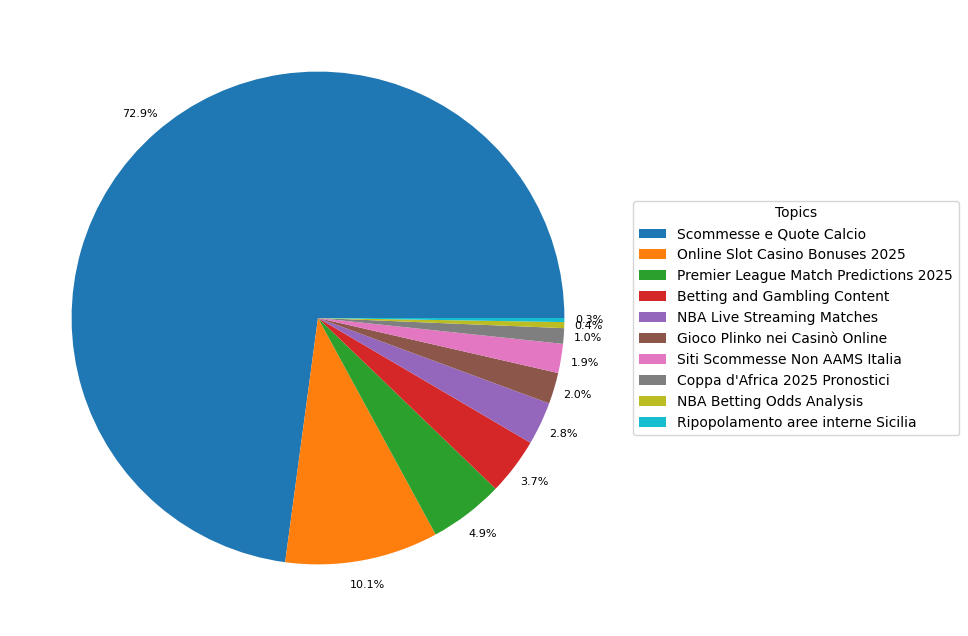

In [64]:
# Create a pie chart with labels and counts (top 10 topics)
fig, ax = plt.subplots(figsize=(12, 8))

wedges, texts, autotexts = ax.pie(
    topic_counts_bet365.head(10)['count'],
    autopct='%1.1f%%',
    pctdistance=1.1,
    textprops={'fontsize': 8}
)

ax.legend(
    wedges,
    topic_counts_bet365.head(10)['Labels'],
    title="Topics",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)


plt.savefig('bet365_pie_chart.png', dpi=300, bbox_inches='tight')
plt.show()

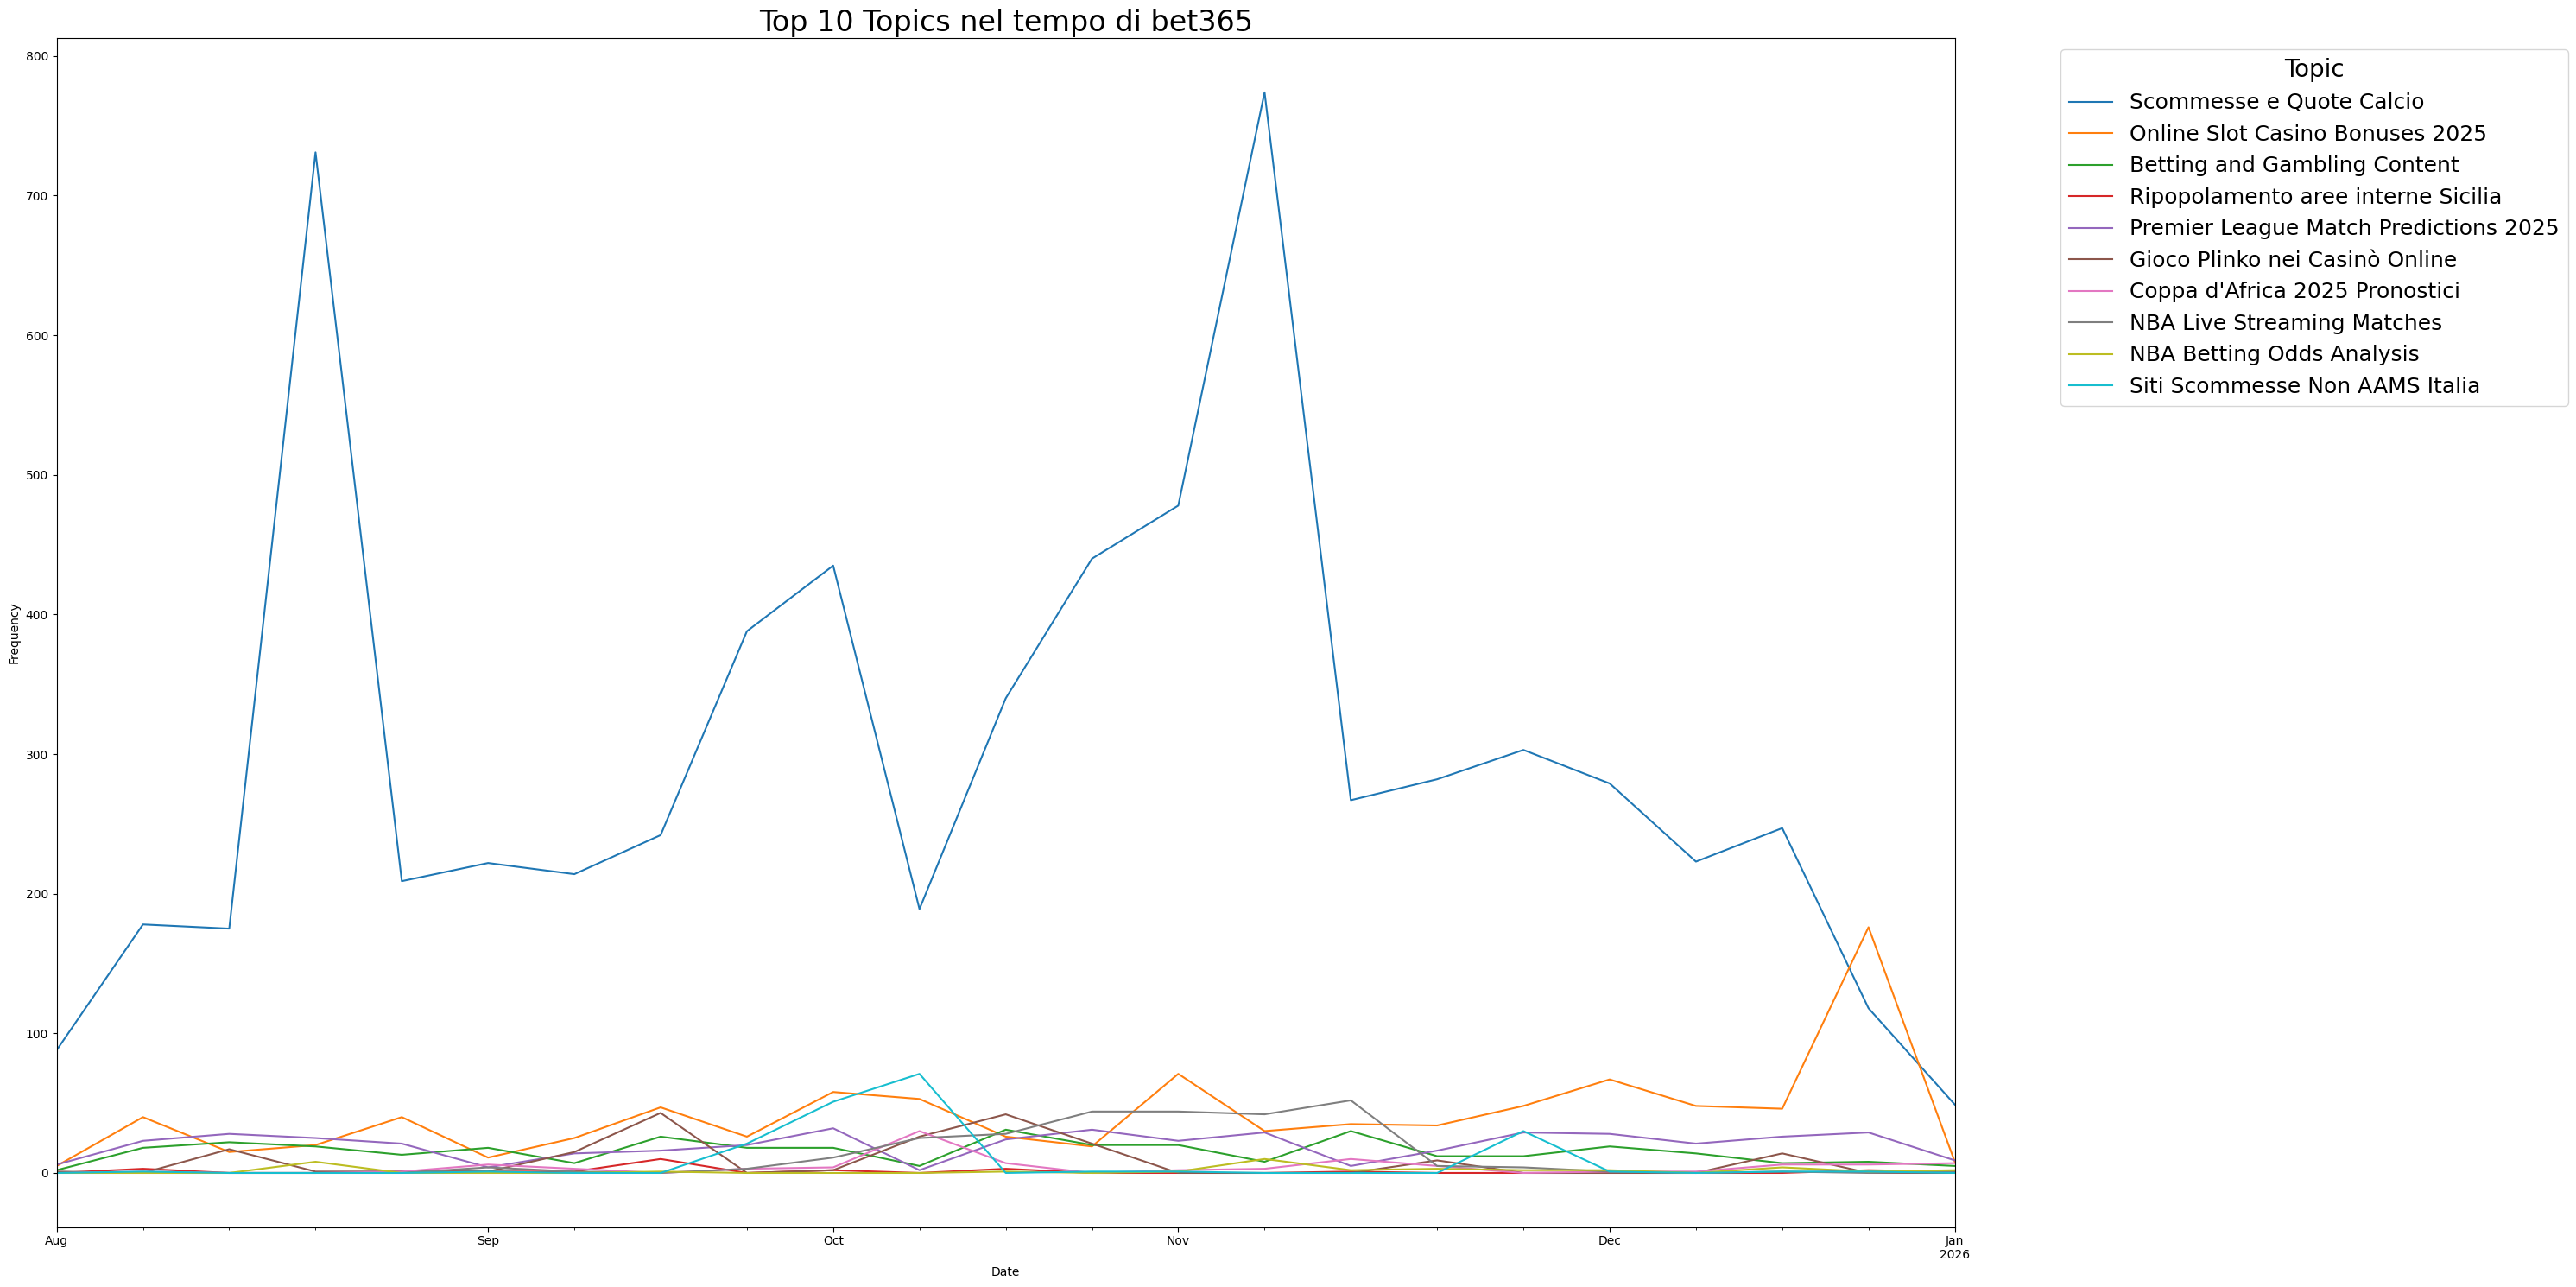

In [32]:
# Exclude -1 and get top topics by frequency
top_topics = bet365_df.loc[bet365_df["Topic"] != -1, "Topic"].value_counts().head(10).index

# Topic -> label mapping
topic_labels = (
    bet365_df.loc[bet365_df["Topic"].isin(top_topics), ["Topic", "Labels"]]
    .drop_duplicates("Topic")
    .set_index("Topic")["Labels"]
)

# Count by date and topic
bet365_df["published_date"] = pd.to_datetime(bet365_df["published_date"], errors="coerce")
counts = (
    bet365_df[bet365_df["Topic"].isin(top_topics)]
    .groupby([bet365_df["published_date"].dt.date, "Topic"])
    .size()
    .unstack(fill_value=0)
)

# smooth: weekly resample + 1-week rolling mean
counts.index = pd.to_datetime(counts.index)
counts = counts.resample("W").sum().rolling(1, min_periods=1).mean()

# Plot with label names
ax = counts.plot(figsize=(30, 15))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [topic_labels.get(int(t), t) for t in labels],
          title="Topic", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=18, title_fontsize=20)
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.title("Top 10 Topics nel tempo di bet365", fontsize=24)
plt.tight_layout()
plt.savefig('bet365_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

## Eurobet

In [65]:
eurobet_df = joined_df[
    joined_df["Brand"].str.contains("Eurobet", case=False, na=False)
].copy()

In [66]:
topic_counts_eurobet = (
    eurobet_df.loc[eurobet_df["Topic"] != -1, ["Topic", "Labels"]]
    .assign(count=1)
    .groupby(["Topic", "Labels"], as_index=False)["count"]
    .sum()
    .sort_values("count", ascending=False)
)
topic_counts_eurobet

Topic                                     Labels  count
1       1            Online Slot Casino Bonuses 2025   2328
0       0                   Scommesse e Quote Calcio    970
2       2               Betting and Gambling Content    445
8       8             Gioco Plinko nei Casinò Online     87
4       4      Premier League Match Predictions 2025     78
12     13  Garlasco Case Investigations and Finances     66
16     17           Illegal Gambling Market Research     51
17     18             Siti Scommesse Non AAMS Italia     34
3       3         Ripopolamento aree interne Sicilia     30
6       6         Lottomatica Stock Discussion Forum     22
14     15       Futuro dell'intrattenimento digitale     20
18     19        X Factor 2025 Finalists Predictions     17
9       9             Coppa d'Africa 2025 Pronostici     11
5       5         Borse Europee e Mercati Finanziari      9
10     11                 NBA Live Streaming Matches      6
13     14                  NBA Betting Odds Analysis      3
15     16                  Online Betting and Gaming      3
7       7           Mooney Callable Bonds Discussion      2
11     12         Australian Football Betting Quotes      1

In [35]:
dfi.export(
    topic_counts_eurobet,
    "topic_counts_eurobet.png",
    table_conversion= "chrome"
)

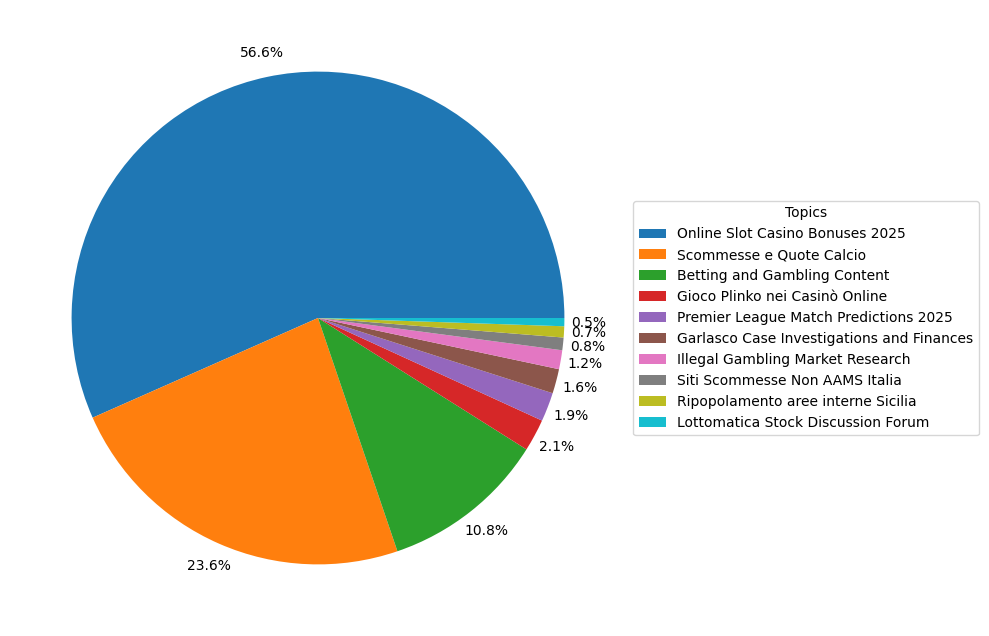

In [92]:
# Create a pie chart with labels and counts (top 10 topics)
fig, ax = plt.subplots(figsize=(12, 8))

wedges, texts, autotexts = ax.pie(
    topic_counts_eurobet.head(10)['count'],
    autopct='%1.1f%%',
    pctdistance=1.1,
    textprops={'fontsize': 10}
)

ax.legend(
    wedges,
    topic_counts_eurobet.head(10)['Labels'],
    title="Topics",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)


plt.savefig('eurobet_pie_chart.png', dpi=300, bbox_inches='tight')
plt.show()

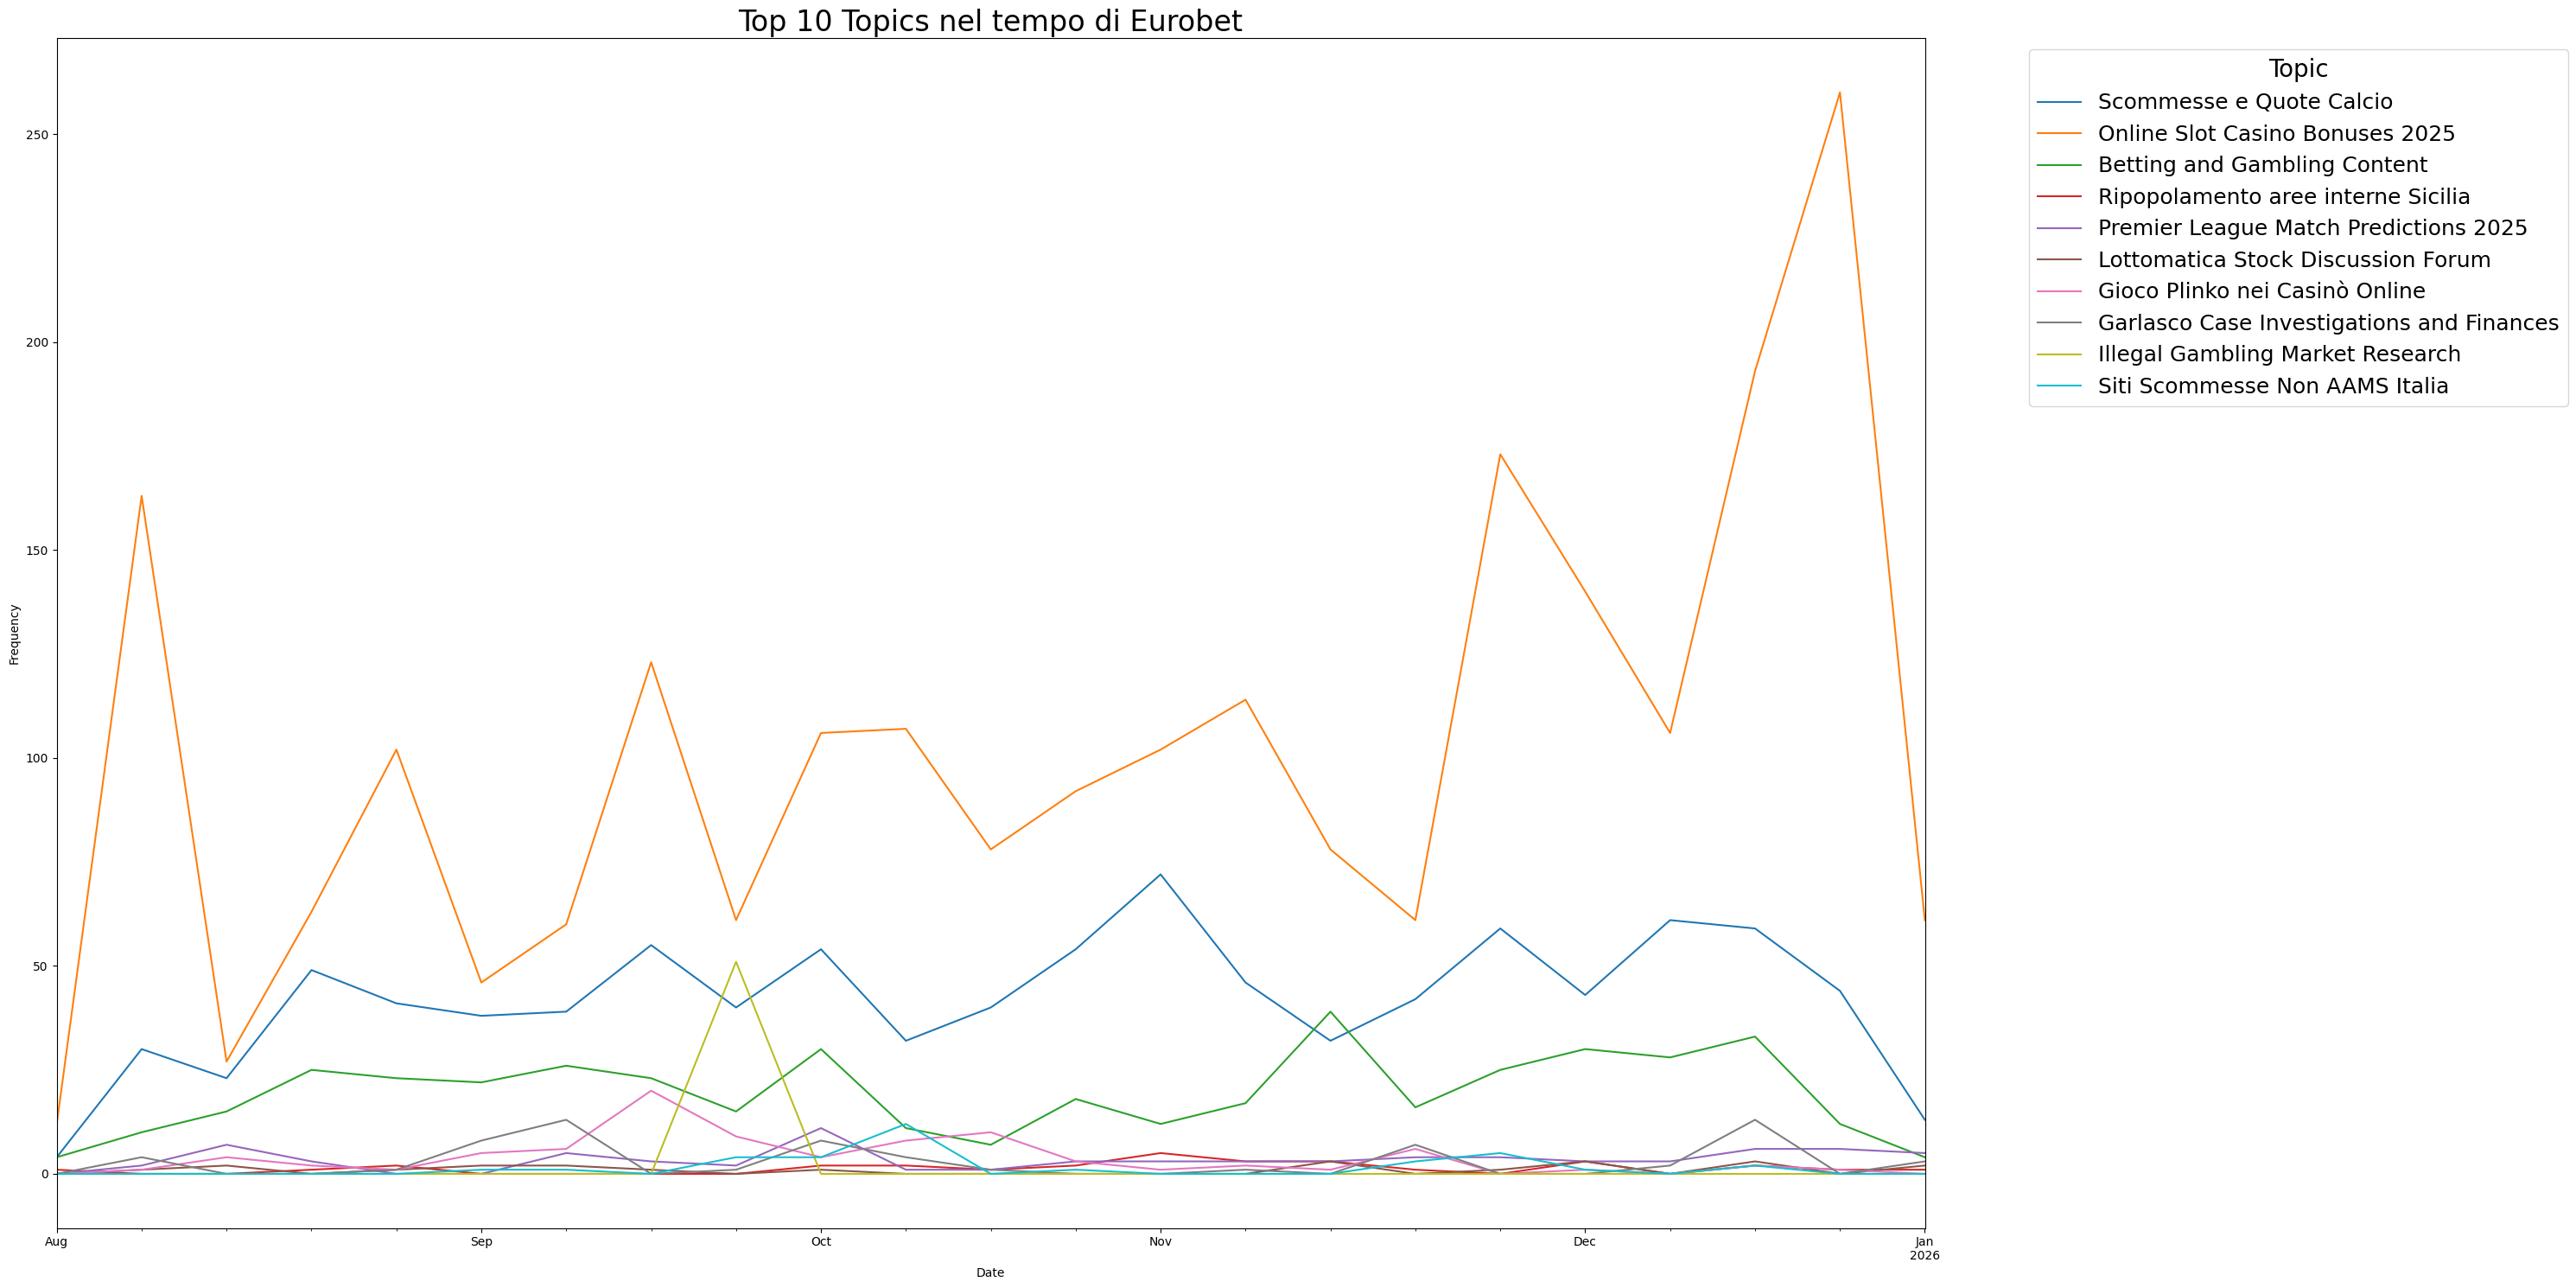

In [37]:
# Exclude -1 and get top topics by frequency
top_topics = eurobet_df.loc[eurobet_df["Topic"] != -1, "Topic"].value_counts().head(10).index

# Topic -> label mapping
topic_labels = (
    eurobet_df.loc[eurobet_df["Topic"].isin(top_topics), ["Topic", "Labels"]]
    .drop_duplicates("Topic")
    .set_index("Topic")["Labels"]
)

# Count by date and topic
eurobet_df["published_date"] = pd.to_datetime(eurobet_df["published_date"], errors="coerce")
counts = (
    eurobet_df[eurobet_df["Topic"].isin(top_topics)]
    .groupby([eurobet_df["published_date"].dt.date, "Topic"])
    .size()
    .unstack(fill_value=0)
)

# smooth: weekly resample + 1-week rolling mean
counts.index = pd.to_datetime(counts.index)
counts = counts.resample("W").sum().rolling(1, min_periods=1).mean()

# Plot with label names
ax = counts.plot(figsize=(30, 15))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [topic_labels.get(int(t), t) for t in labels],
          title="Topic", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=18, title_fontsize=20)
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.title("Top 10 Topics nel tempo di Eurobet", fontsize=24)
plt.tight_layout()
plt.savefig('eurobet_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

## Goldbet

In [68]:
goldbet_df = joined_df[
    joined_df["Brand"].str.contains("Goldbet", case=False, na=False)
].copy()

In [69]:
topic_counts_goldbet = (
    goldbet_df.loc[goldbet_df["Topic"] != -1, ["Topic", "Labels"]]
    .assign(count=1)
    .groupby(["Topic", "Labels"], as_index=False)["count"]
    .sum()
    .sort_values("count", ascending=False)
)
topic_counts_goldbet

Topic                                     Labels  count
0       0                   Scommesse e Quote Calcio   2529
1       1            Online Slot Casino Bonuses 2025   1312
2       2               Betting and Gambling Content    432
4       4      Premier League Match Predictions 2025    402
8       9             Coppa d'Africa 2025 Pronostici    117
9      11                 NBA Live Streaming Matches     60
7       8             Gioco Plinko nei Casinò Online     59
11     13  Garlasco Case Investigations and Finances     45
3       3         Ripopolamento aree interne Sicilia     25
13     15       Futuro dell'intrattenimento digitale     22
15     18             Siti Scommesse Non AAMS Italia     21
6       6         Lottomatica Stock Discussion Forum      7
16     19        X Factor 2025 Finalists Predictions      6
5       5         Borse Europee e Mercati Finanziari      4
12     14                  NBA Betting Odds Analysis      3
10     12         Australian Football Betting Quotes      1
14     16                  Online Betting and Gaming      1

In [40]:
dfi.export(
    topic_counts_goldbet,
    "topic_counts_goldbet.png",
    table_conversion= "chrome"
)

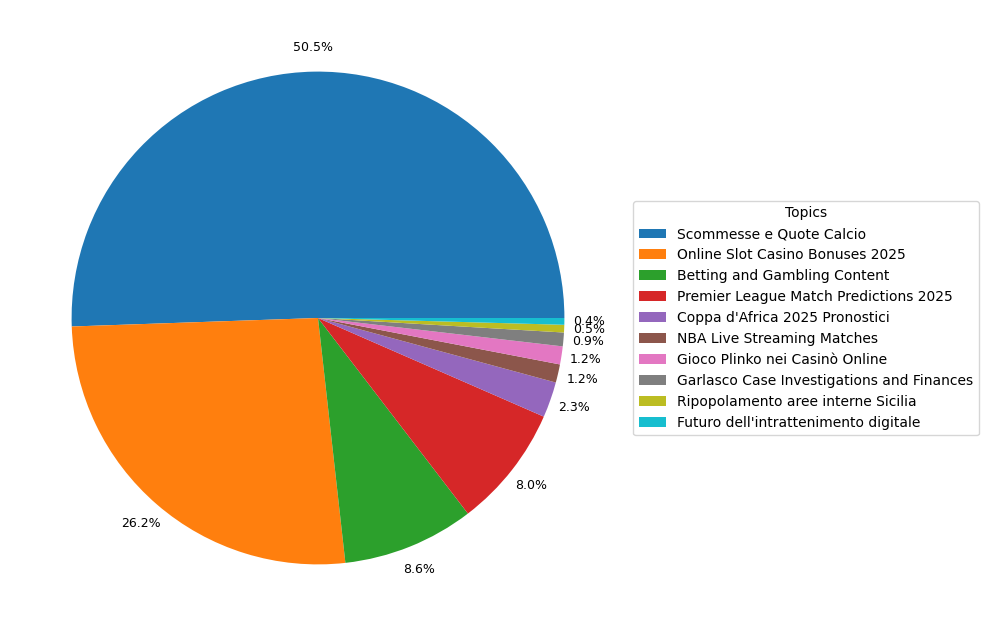

In [71]:
# Create a pie chart with labels and counts (top 10 topics)
fig, ax = plt.subplots(figsize=(12, 8))

wedges, texts, autotexts = ax.pie(
    topic_counts_goldbet.head(10)['count'],
    autopct='%1.1f%%',
    pctdistance=1.1,
    textprops={'fontsize': 9}
)

ax.legend(
    wedges,
    topic_counts_goldbet.head(10)['Labels'],
    title="Topics",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)


plt.savefig('goldbet_pie_chart.png', dpi=300, bbox_inches='tight')
plt.show()

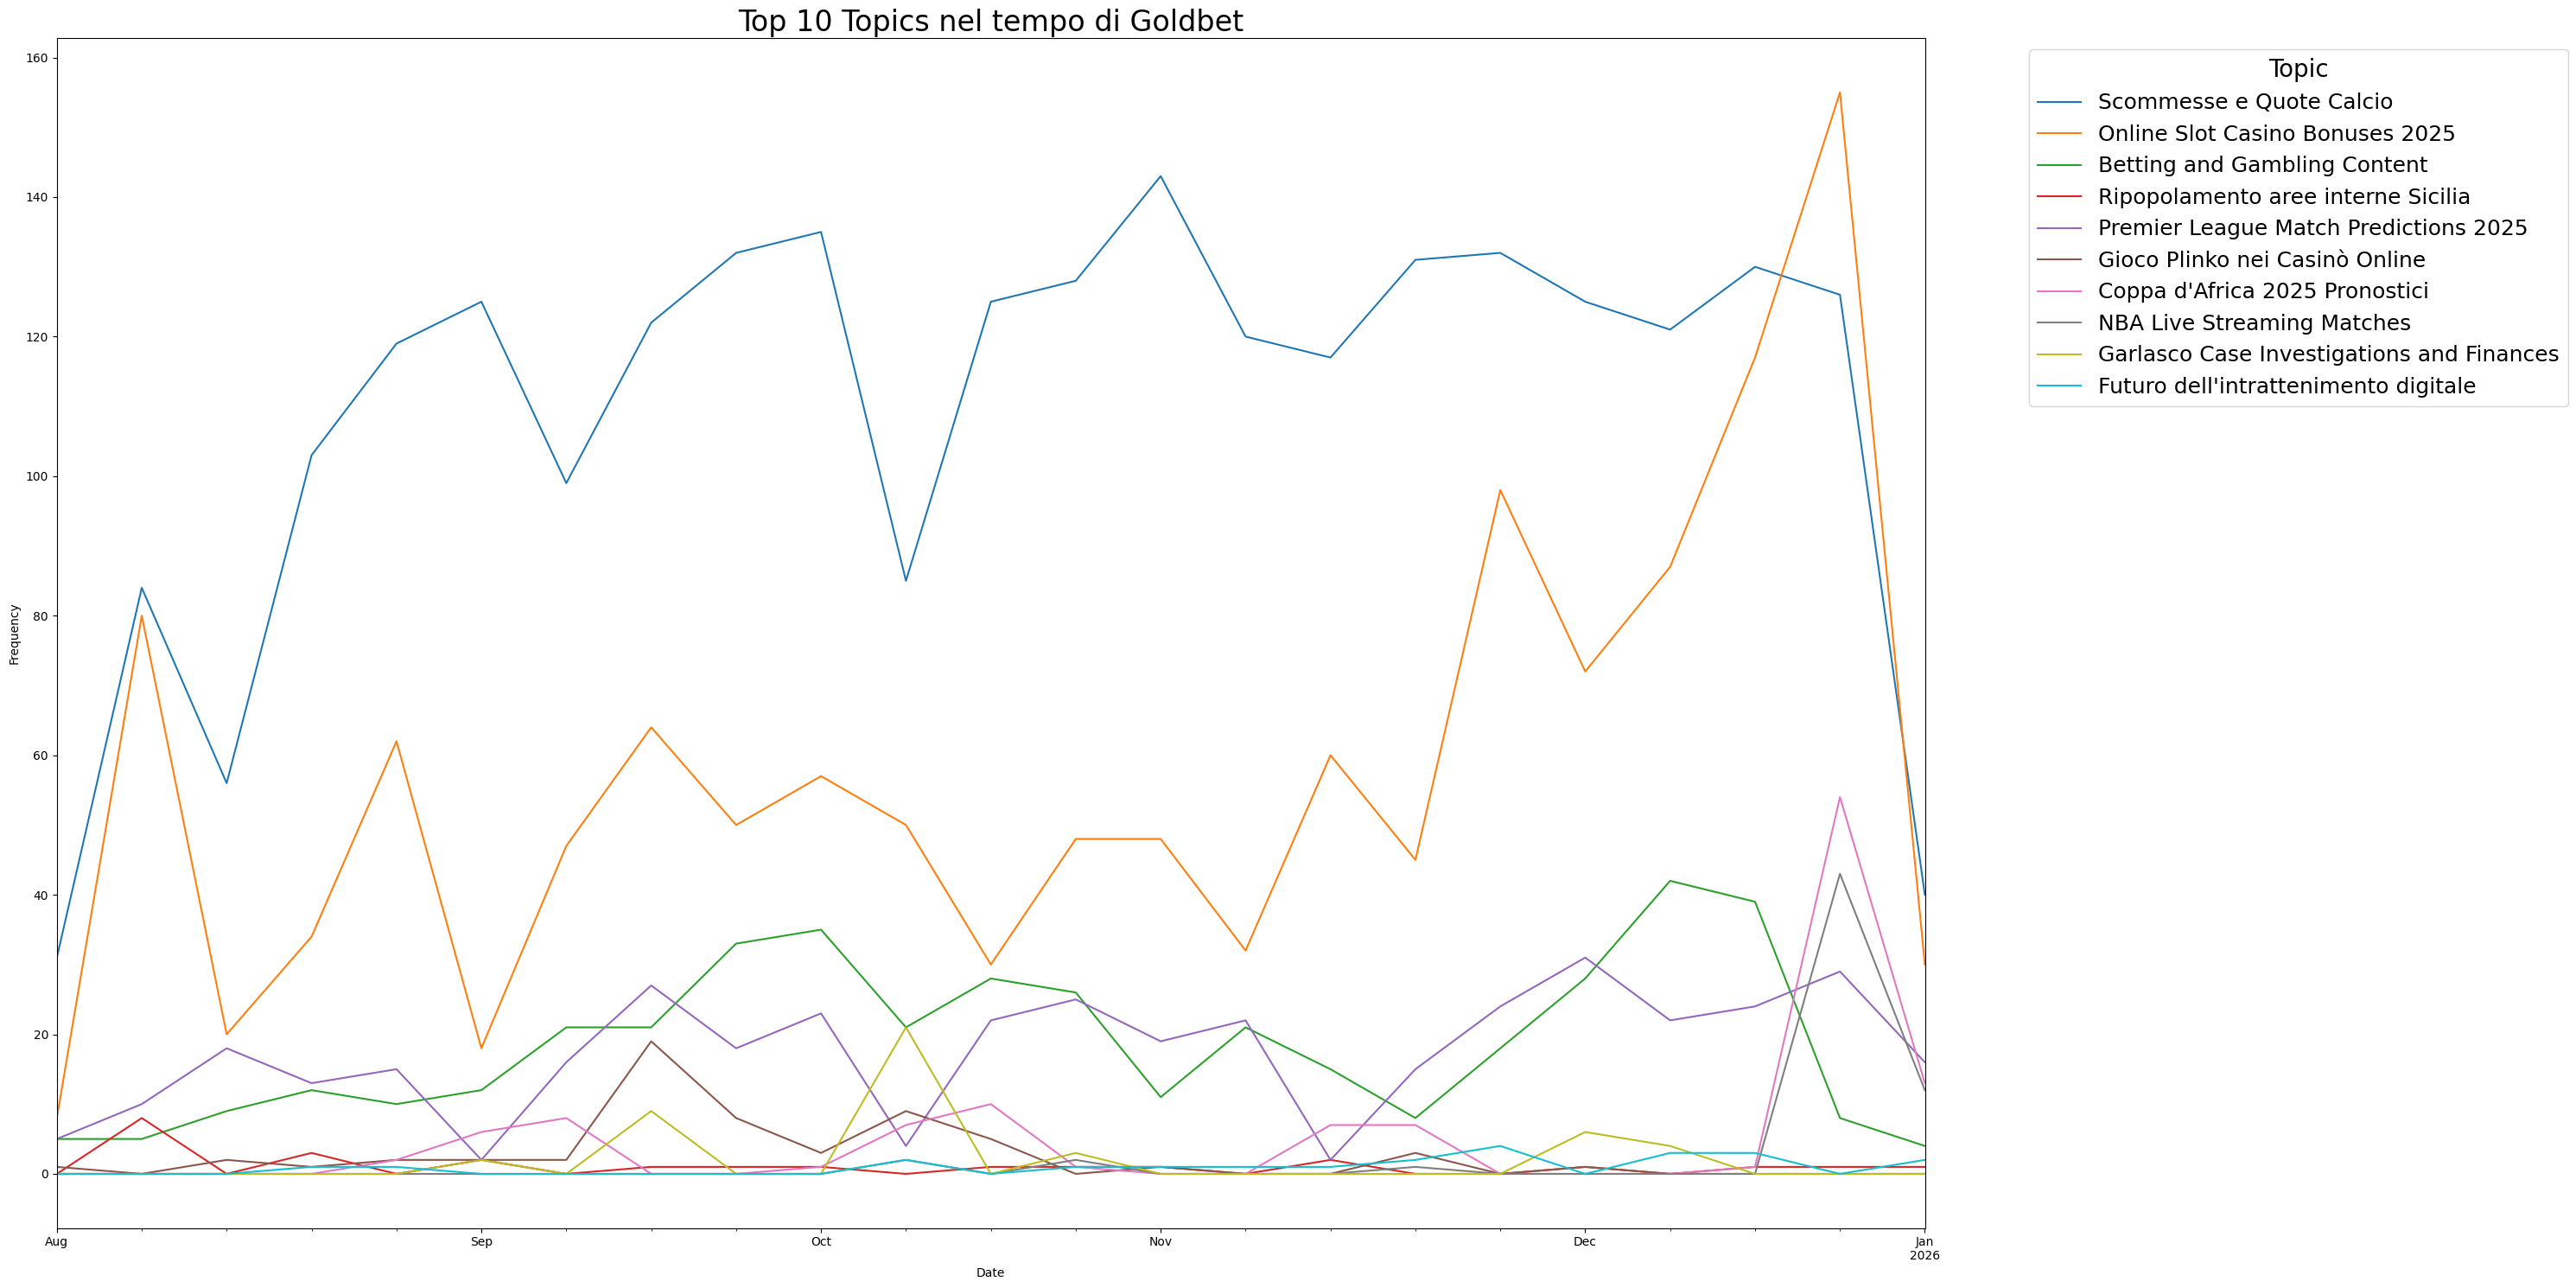

In [42]:
# Exclude -1 and get top topics by frequency
top_topics = goldbet_df.loc[goldbet_df["Topic"] != -1, "Topic"].value_counts().head(10).index

# Topic -> label mapping
topic_labels = (
    goldbet_df.loc[goldbet_df["Topic"].isin(top_topics), ["Topic", "Labels"]]
    .drop_duplicates("Topic")
    .set_index("Topic")["Labels"]
)

# Count by date and topic
goldbet_df["published_date"] = pd.to_datetime(goldbet_df["published_date"], errors="coerce")
counts = (
    goldbet_df[goldbet_df["Topic"].isin(top_topics)]
    .groupby([goldbet_df["published_date"].dt.date, "Topic"])
    .size()
    .unstack(fill_value=0)
)

# smooth: weekly resample + 1-week rolling mean
counts.index = pd.to_datetime(counts.index)
counts = counts.resample("W").sum().rolling(1, min_periods=1).mean()

# Plot with label names
ax = counts.plot(figsize=(30, 15))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [topic_labels.get(int(t), t) for t in labels],
          title="Topic", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=18, title_fontsize=20)
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.title("Top 10 Topics nel tempo di Goldbet", fontsize=24)
plt.tight_layout()
plt.savefig('goldbet_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

## Betsson

In [72]:
betsson_df = joined_df[
    joined_df["Brand"].str.contains("Betsson", case=False, na=False)
].copy()

In [73]:
topic_counts_betsson = (
    betsson_df.loc[betsson_df["Topic"] != -1, ["Topic", "Labels"]]
    .assign(count=1)
    .groupby(["Topic", "Labels"], as_index=False)["count"]
    .sum()
    .sort_values("count", ascending=False)
)
topic_counts_betsson

Topic                                     Labels  count
1       1            Online Slot Casino Bonuses 2025   1231
0       0                   Scommesse e Quote Calcio   1141
2       2               Betting and Gambling Content    346
8       8             Gioco Plinko nei Casinò Online    151
4       4      Premier League Match Predictions 2025     94
3       3         Ripopolamento aree interne Sicilia     65
9       9             Coppa d'Africa 2025 Pronostici     24
6       6         Lottomatica Stock Discussion Forum     17
13     15       Futuro dell'intrattenimento digitale     10
15     18             Siti Scommesse Non AAMS Italia     10
10     11                 NBA Live Streaming Matches      6
14     16                  Online Betting and Gaming      5
12     14                  NBA Betting Odds Analysis      3
5       5         Borse Europee e Mercati Finanziari      2
7       7           Mooney Callable Bonds Discussion      2
11     13  Garlasco Case Investigations and Finances      1
16     19        X Factor 2025 Finalists Predictions      1

In [45]:
dfi.export(
    topic_counts_betsson,
    "topic_counts_betsson.png",
    table_conversion= "chrome"
)

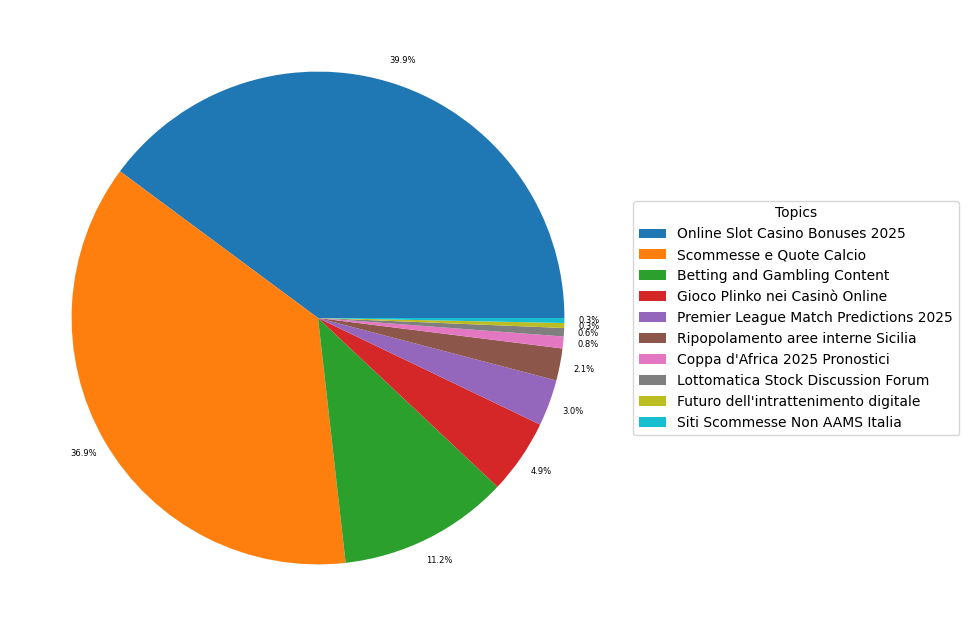

In [78]:
# Create a pie chart with labels and counts (top 10 topics)
fig, ax = plt.subplots(figsize=(12, 8))

wedges, texts, autotexts = ax.pie(
    topic_counts_betsson.head(10)['count'],
    autopct='%1.1f%%',
    pctdistance=1.1,
    textprops={'fontsize': 6}
)

ax.legend(
    wedges,
    topic_counts_betsson.head(10)['Labels'],
    title="Topics",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)


plt.savefig('betsson_pie_chart.png', dpi=300, bbox_inches='tight')
plt.show()

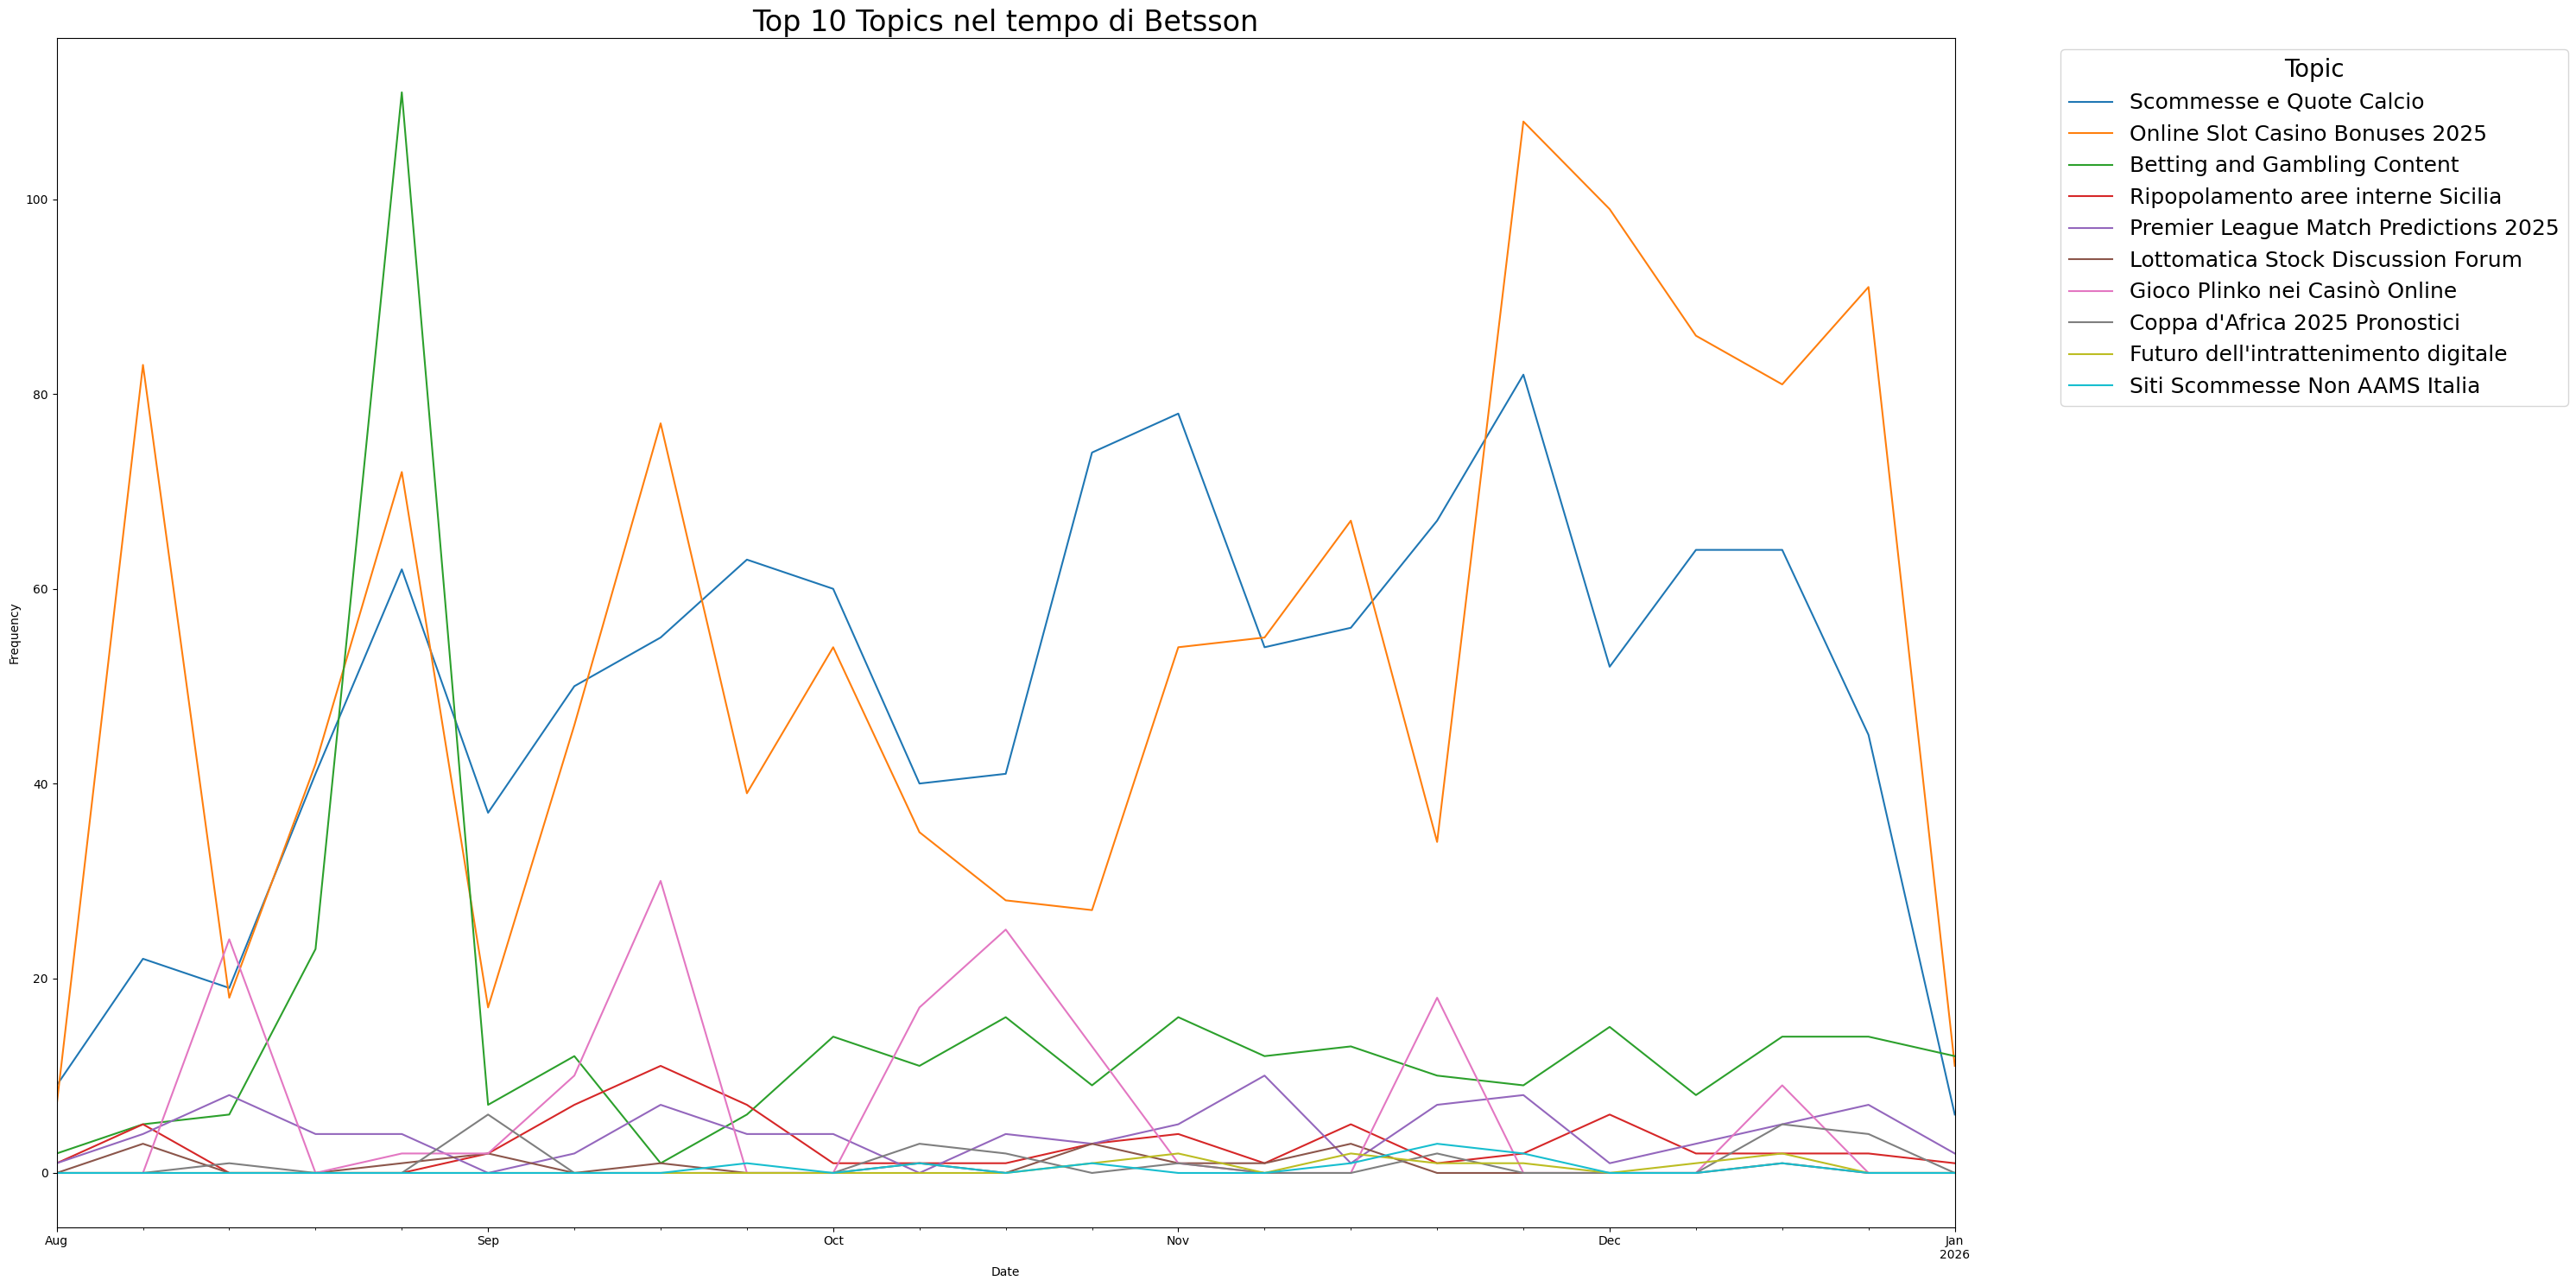

In [47]:
# Exclude -1 and get top topics by frequency
top_topics = betsson_df.loc[betsson_df["Topic"] != -1, "Topic"].value_counts().head(10).index

# Topic -> label mapping
topic_labels = (
    betsson_df.loc[betsson_df["Topic"].isin(top_topics), ["Topic", "Labels"]]
    .drop_duplicates("Topic")
    .set_index("Topic")["Labels"]
)

# Count by date and topic
betsson_df["published_date"] = pd.to_datetime(betsson_df["published_date"], errors="coerce")
counts = (
    betsson_df[betsson_df["Topic"].isin(top_topics)]
    .groupby([betsson_df["published_date"].dt.date, "Topic"])
    .size()
    .unstack(fill_value=0)
)

# smooth: weekly resample + 1-week rolling mean
counts.index = pd.to_datetime(counts.index)
counts = counts.resample("W").sum().rolling(1, min_periods=1).mean()

# Plot with label names
ax = counts.plot(figsize=(30, 15))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [topic_labels.get(int(t), t) for t in labels],
          title="Topic", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=18, title_fontsize=20)
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.title("Top 10 Topics nel tempo di Betsson", fontsize=24)
plt.tight_layout()
plt.savefig('betsson_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

## 888Casino

In [79]:
casino_888_df = joined_df[
    joined_df["Brand"].str.contains("888", case=False, na=False)
].copy()

In [80]:
topic_counts_casino_888 = (
    casino_888_df.loc[casino_888_df["Topic"] != -1, ["Topic", "Labels"]]
    .assign(count=1)
    .groupby(["Topic", "Labels"], as_index=False)["count"]
    .sum()
    .sort_values("count", ascending=False)
)
topic_counts_casino_888

Topic                                Labels  count
1       1       Online Slot Casino Bonuses 2025   2366
6       8        Gioco Plinko nei Casinò Online    321
8      15  Futuro dell'intrattenimento digitale     30
0       0              Scommesse e Quote Calcio     10
3       3    Ripopolamento aree interne Sicilia     10
2       2          Betting and Gambling Content      8
9      18        Siti Scommesse Non AAMS Italia      5
5       6    Lottomatica Stock Discussion Forum      4
4       5    Borse Europee e Mercati Finanziari      2
7      11            NBA Live Streaming Matches      2
10     19   X Factor 2025 Finalists Predictions      1

In [50]:
dfi.export(
    topic_counts_casino_888,
    "topic_counts_casino_888.png",
    table_conversion= "chrome"
)

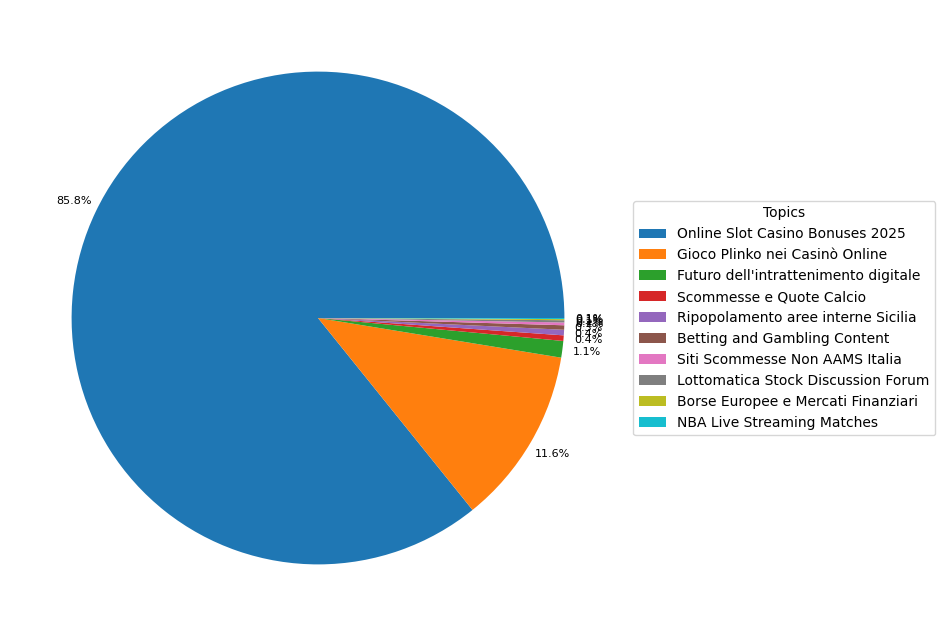

In [94]:
# Create a pie chart with labels and counts (top 10 topics)
fig, ax = plt.subplots(figsize=(12, 8))

wedges, texts, autotexts = ax.pie(
    topic_counts_casino_888.head(10)['count'],
    autopct='%1.1f%%',
    pctdistance=1.1,
    textprops={'fontsize': 8}
)

ax.legend(
    wedges,
    topic_counts_casino_888.head(10)['Labels'],
    title="Topics",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)


plt.savefig('casino_888_pie_chart.png', dpi=300, bbox_inches='tight')
plt.show()

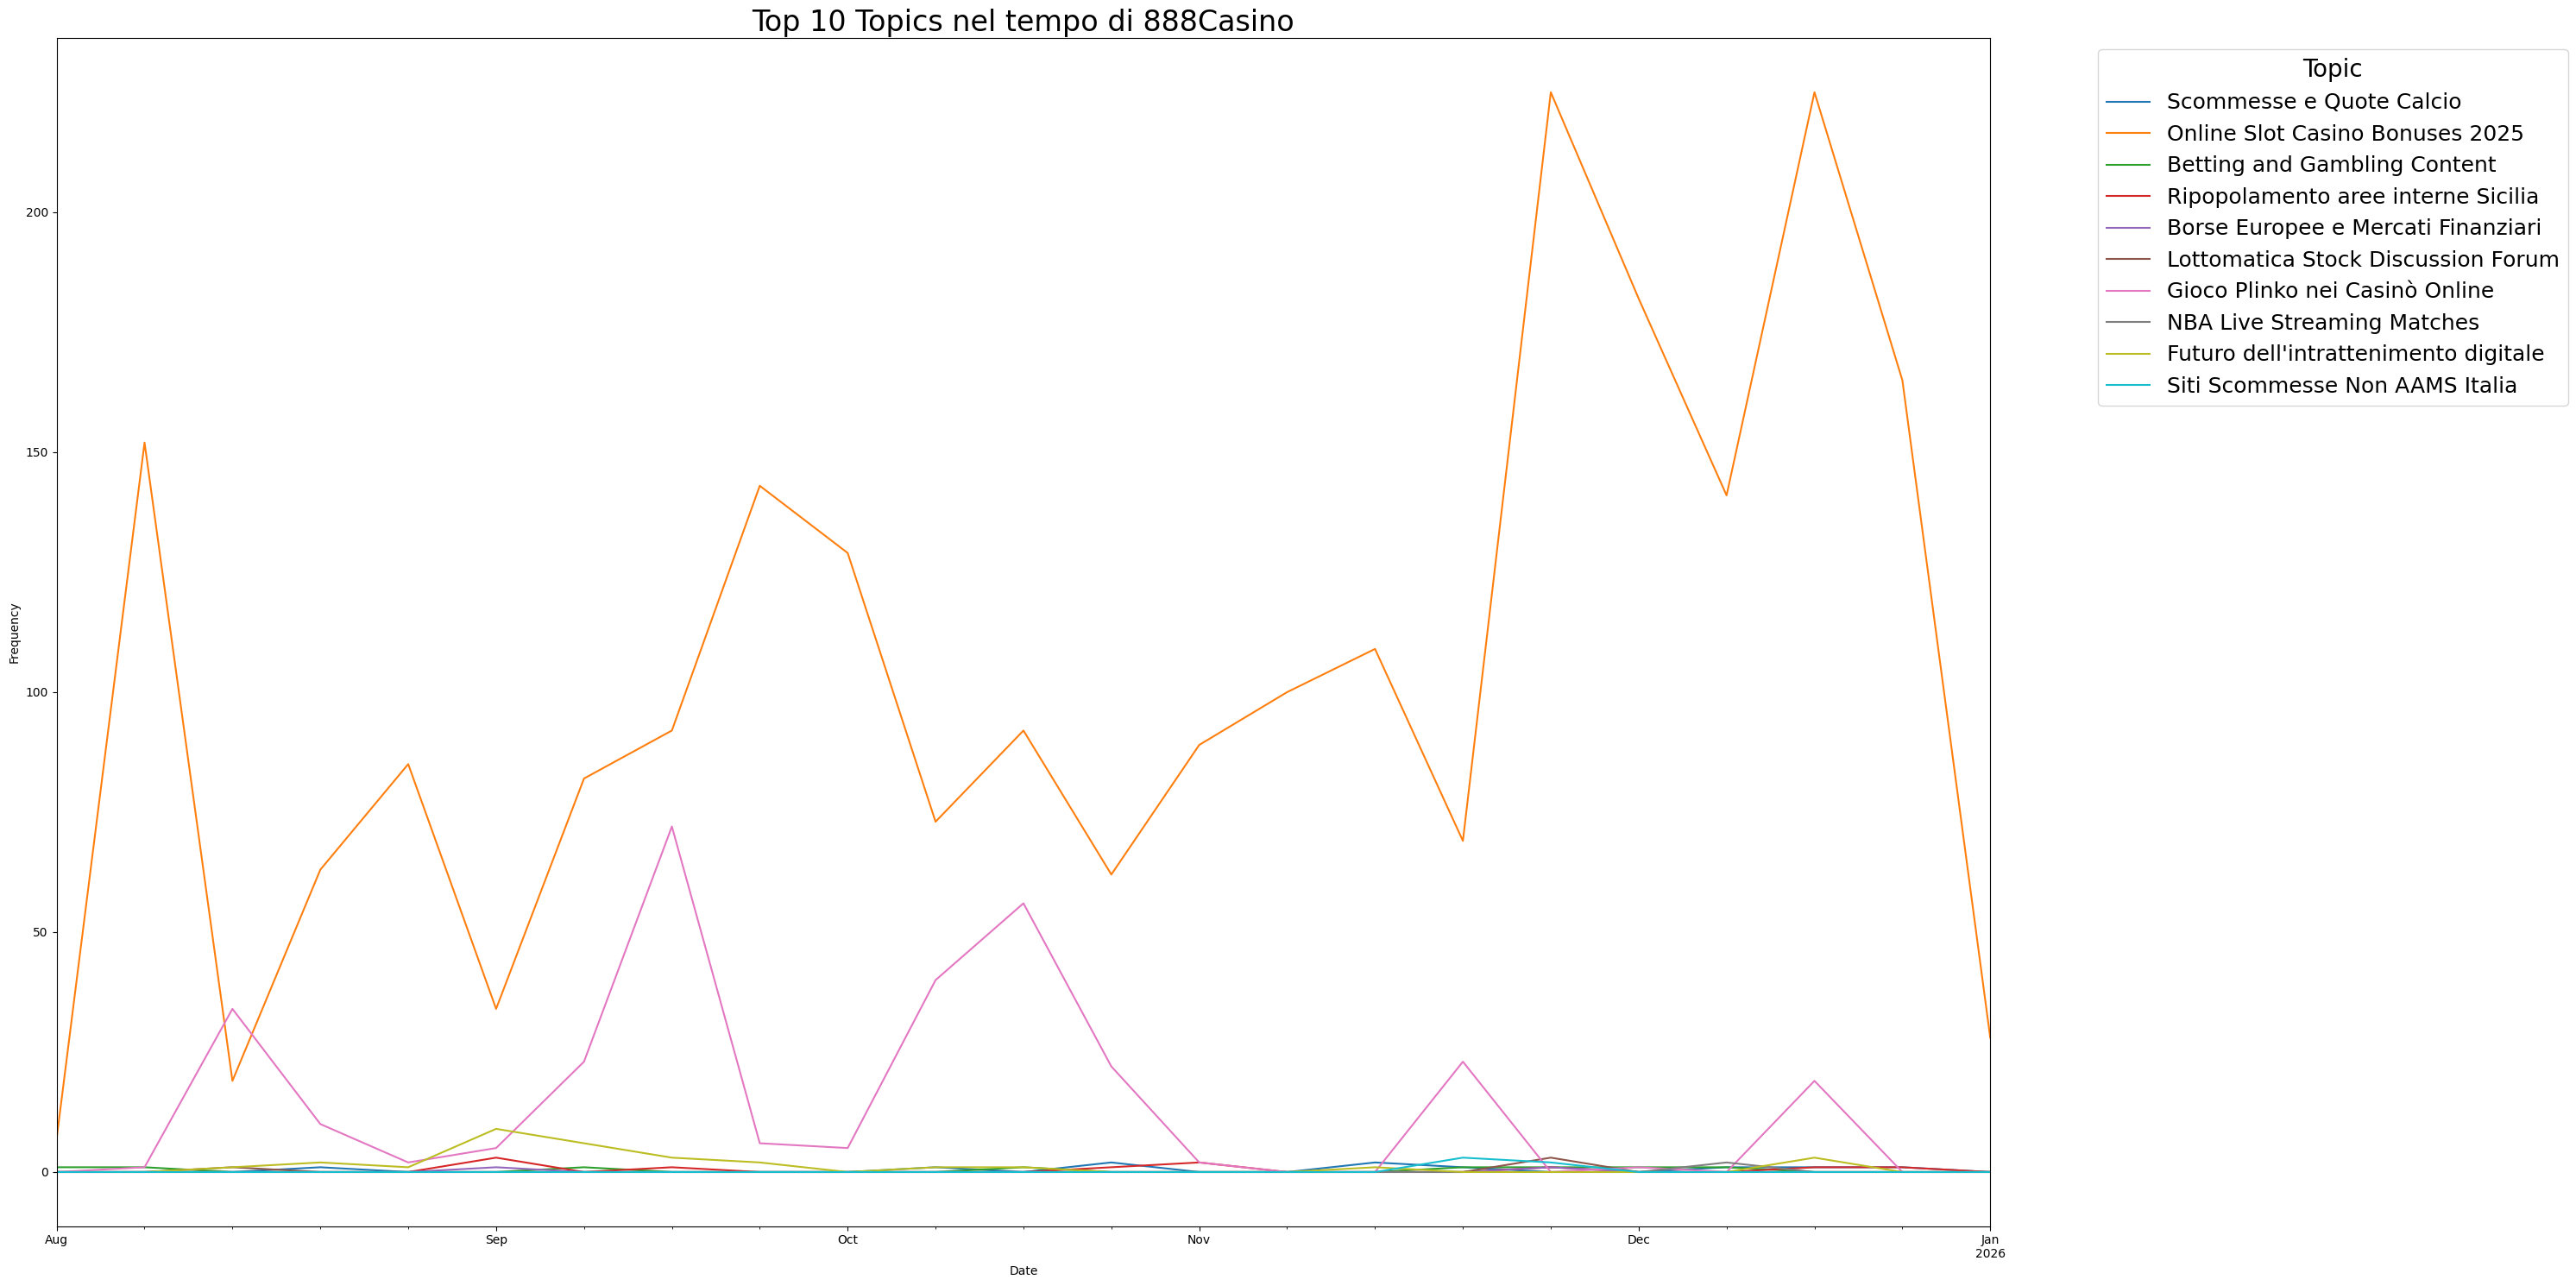

In [52]:
# Exclude -1 and get top topics by frequency
top_topics = casino_888_df.loc[casino_888_df["Topic"] != -1, "Topic"].value_counts().head(10).index

# Topic -> label mapping
topic_labels = (
    casino_888_df.loc[casino_888_df["Topic"].isin(top_topics), ["Topic", "Labels"]]
    .drop_duplicates("Topic")
    .set_index("Topic")["Labels"]
)

# Count by date and topic
casino_888_df["published_date"] = pd.to_datetime(casino_888_df["published_date"], errors="coerce")
counts = (
    casino_888_df[casino_888_df["Topic"].isin(top_topics)]
    .groupby([casino_888_df["published_date"].dt.date, "Topic"])
    .size()
    .unstack(fill_value=0)
)

# smooth: weekly resample + 1-week rolling mean
counts.index = pd.to_datetime(counts.index)
counts = counts.resample("W").sum().rolling(1, min_periods=1).mean()

# Plot with label names
ax = counts.plot(figsize=(30, 15))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [topic_labels.get(int(t), t) for t in labels],
          title="Topic", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=18, title_fontsize=20)
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.title("Top 10 Topics nel tempo di 888Casino", fontsize=24)
plt.tight_layout()
plt.savefig('888casino_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

## PokerStars

In [85]:
pokerstars_df = joined_df[
    joined_df["Brand"].str.contains("PokerStars", case=False, na=False)
].copy()

In [86]:
topic_counts_pokerstars = (
    pokerstars_df.loc[pokerstars_df["Topic"] != -1, ["Topic", "Labels"]]
    .assign(count=1)
    .groupby(["Topic", "Labels"], as_index=False)["count"]
    .sum()
    .sort_values("count", ascending=False)
)
topic_counts_pokerstars

Topic                                     Labels  count
1       1            Online Slot Casino Bonuses 2025   2329
2       2               Betting and Gambling Content    492
0       0                   Scommesse e Quote Calcio    143
3       3         Ripopolamento aree interne Sicilia     39
12     15       Futuro dell'intrattenimento digitale     36
4       4      Premier League Match Predictions 2025      9
6       6         Lottomatica Stock Discussion Forum      6
7       8             Gioco Plinko nei Casinò Online      6
11     13  Garlasco Case Investigations and Finances      5
5       5         Borse Europee e Mercati Finanziari      2
8       9             Coppa d'Africa 2025 Pronostici      1
9      11                 NBA Live Streaming Matches      1
10     12         Australian Football Betting Quotes      1
13     19        X Factor 2025 Finalists Predictions      1

In [55]:
dfi.export(
    topic_counts_pokerstars,
    "topic_counts_pokerstars.png",
    table_conversion= "chrome"
)

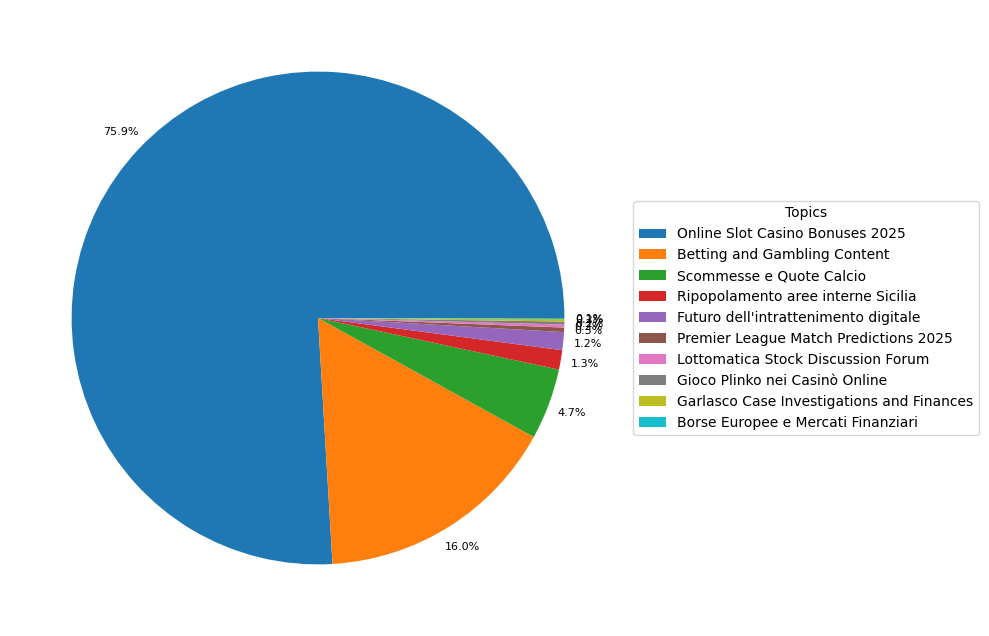

In [87]:
# Create a pie chart with labels and counts (top 10 topics)
fig, ax = plt.subplots(figsize=(12, 8))

wedges, texts, autotexts = ax.pie(
    topic_counts_pokerstars.head(10)['count'],
    autopct='%1.1f%%',
    pctdistance=1.1,
    textprops={'fontsize': 8}
)

ax.legend(
    wedges,
    topic_counts_pokerstars.head(10)['Labels'],
    title="Topics",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)


plt.savefig('pokerstars_pie_chart.png', dpi=300, bbox_inches='tight')
plt.show()

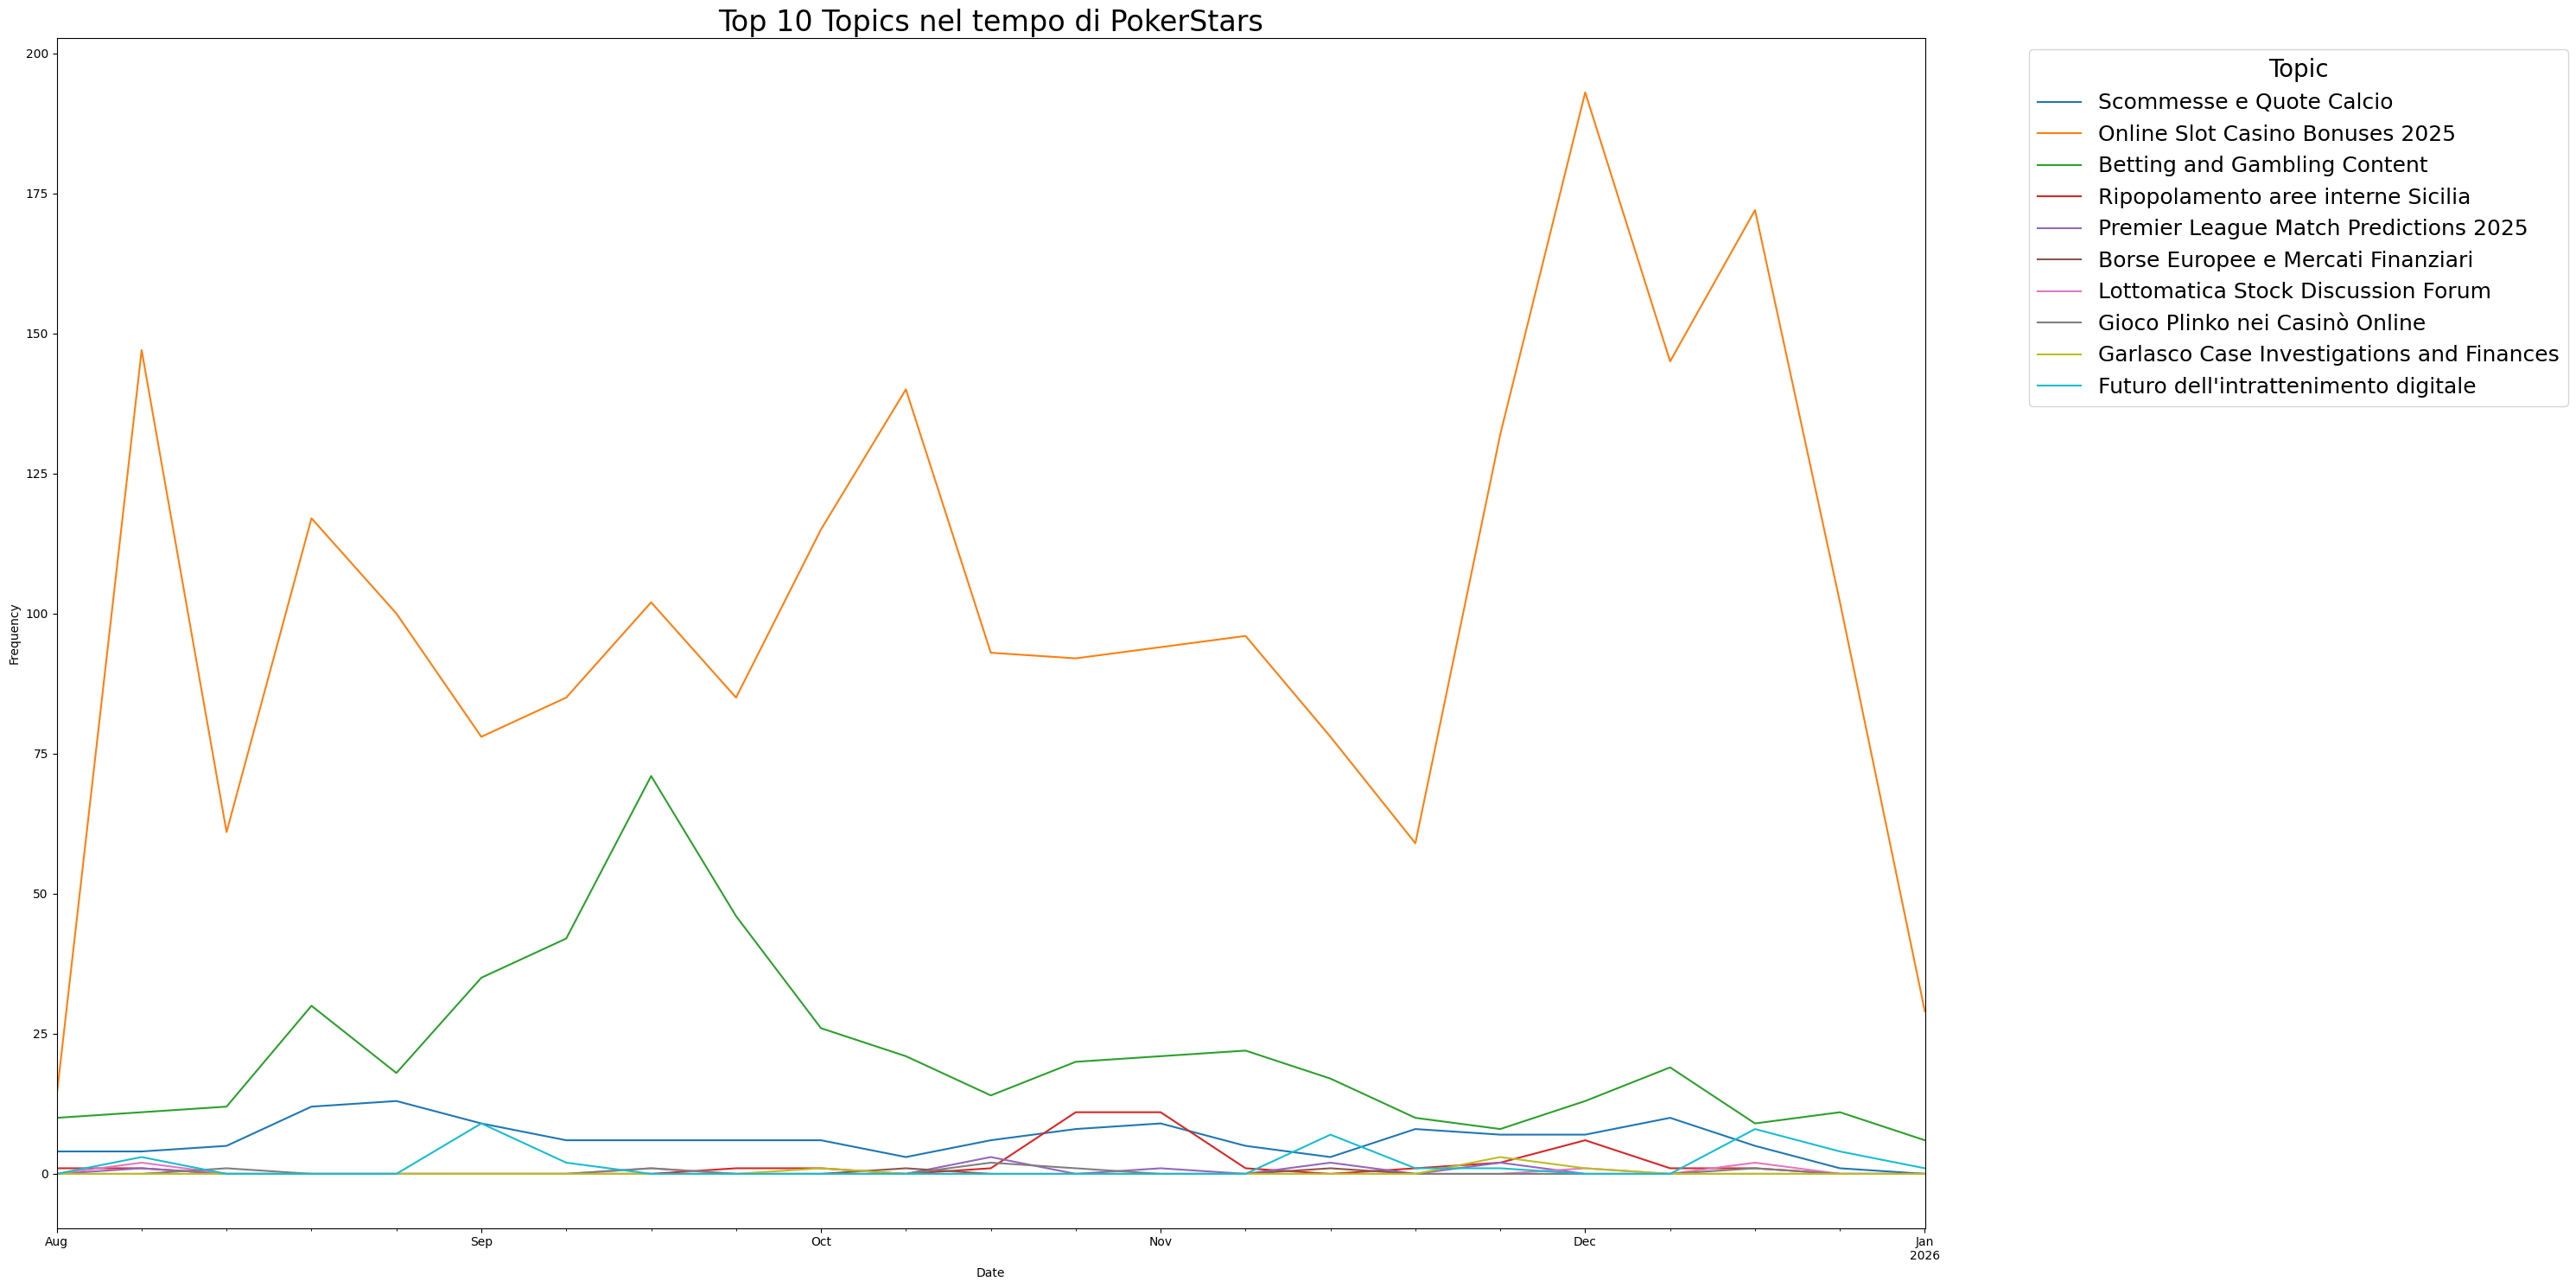

In [57]:
# Exclude -1 and get top topics by frequency
top_topics = pokerstars_df.loc[pokerstars_df["Topic"] != -1, "Topic"].value_counts().head(10).index

# Topic -> label mapping
topic_labels = (
    pokerstars_df.loc[pokerstars_df["Topic"].isin(top_topics), ["Topic", "Labels"]]
    .drop_duplicates("Topic")
    .set_index("Topic")["Labels"]
)

# Count by date and topic
pokerstars_df["published_date"] = pd.to_datetime(pokerstars_df["published_date"], errors="coerce")
counts = (
    pokerstars_df[pokerstars_df["Topic"].isin(top_topics)]
    .groupby([pokerstars_df["published_date"].dt.date, "Topic"])
    .size()
    .unstack(fill_value=0)
)

# smooth: weekly resample + 1-week rolling mean
counts.index = pd.to_datetime(counts.index)
counts = counts.resample("W").sum().rolling(1, min_periods=1).mean()

# Plot with label names
ax = counts.plot(figsize=(30, 15))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [topic_labels.get(int(t), t) for t in labels],
          title="Topic", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=18, title_fontsize=20)
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.title("Top 10 Topics nel tempo di PokerStars", fontsize=24)
plt.tight_layout()
plt.savefig('pokerstars_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

## Planetwin365

In [88]:
planetwin365_df = joined_df[
    joined_df["Brand"].str.contains("Planetwin365", case=False, na=False)
].copy()

In [89]:
topic_counts_planetwin365 = (
    planetwin365_df.loc[planetwin365_df["Topic"] != -1, ["Topic", "Labels"]]
    .assign(count=1)
    .groupby(["Topic", "Labels"], as_index=False)["count"]
    .sum()
    .sort_values("count", ascending=False)
)
topic_counts_planetwin365

Topic                                     Labels  count
0       0                   Scommesse e Quote Calcio   1262
1       1            Online Slot Casino Bonuses 2025    754
2       2               Betting and Gambling Content    159
12     15       Futuro dell'intrattenimento digitale     83
7       8             Gioco Plinko nei Casinò Online     71
4       4      Premier League Match Predictions 2025     64
8       9             Coppa d'Africa 2025 Pronostici     38
3       3         Ripopolamento aree interne Sicilia     26
14     19        X Factor 2025 Finalists Predictions     19
11     13  Garlasco Case Investigations and Finances      7
13     18             Siti Scommesse Non AAMS Italia      4
10     11                 NBA Live Streaming Matches      3
5       5         Borse Europee e Mercati Finanziari      2
6       6         Lottomatica Stock Discussion Forum      2
9      10                   Horse Racing Events 2025      1

In [60]:
dfi.export(
    topic_counts_planetwin365,
    "topic_counts_planetwin365.png",
    table_conversion= "chrome"
)

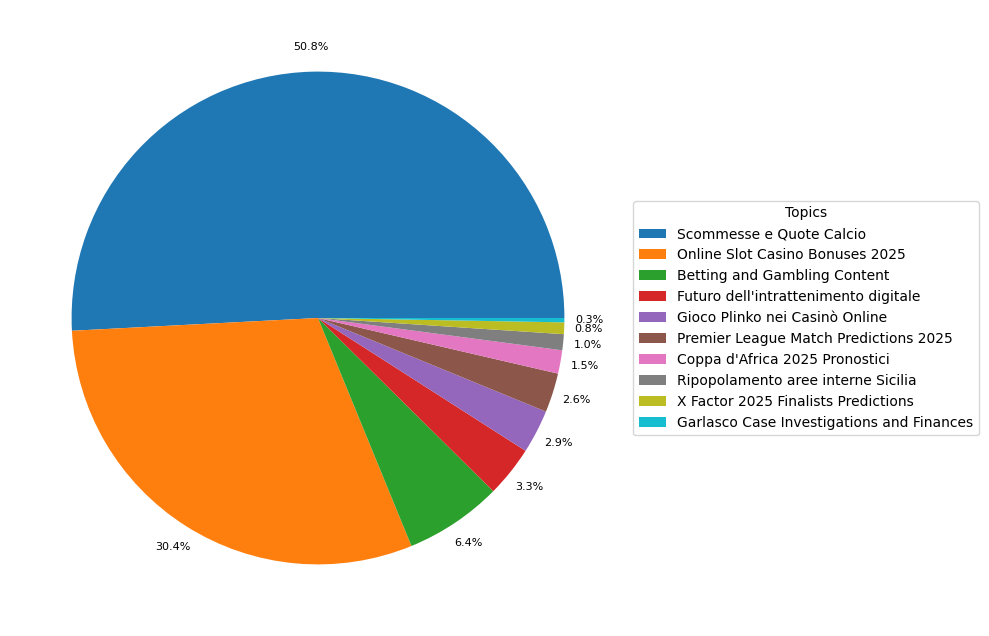

In [90]:
# Create a pie chart with labels and counts (top 10 topics)
fig, ax = plt.subplots(figsize=(12, 8))

wedges, texts, autotexts = ax.pie(
    topic_counts_planetwin365.head(10)['count'],
    autopct='%1.1f%%',
    pctdistance=1.1,
    textprops={'fontsize': 8}
)

ax.legend(
    wedges,
    topic_counts_planetwin365.head(10)['Labels'],
    title="Topics",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)


plt.savefig('planetwin365_pie_chart.png', dpi=300, bbox_inches='tight')
plt.show()

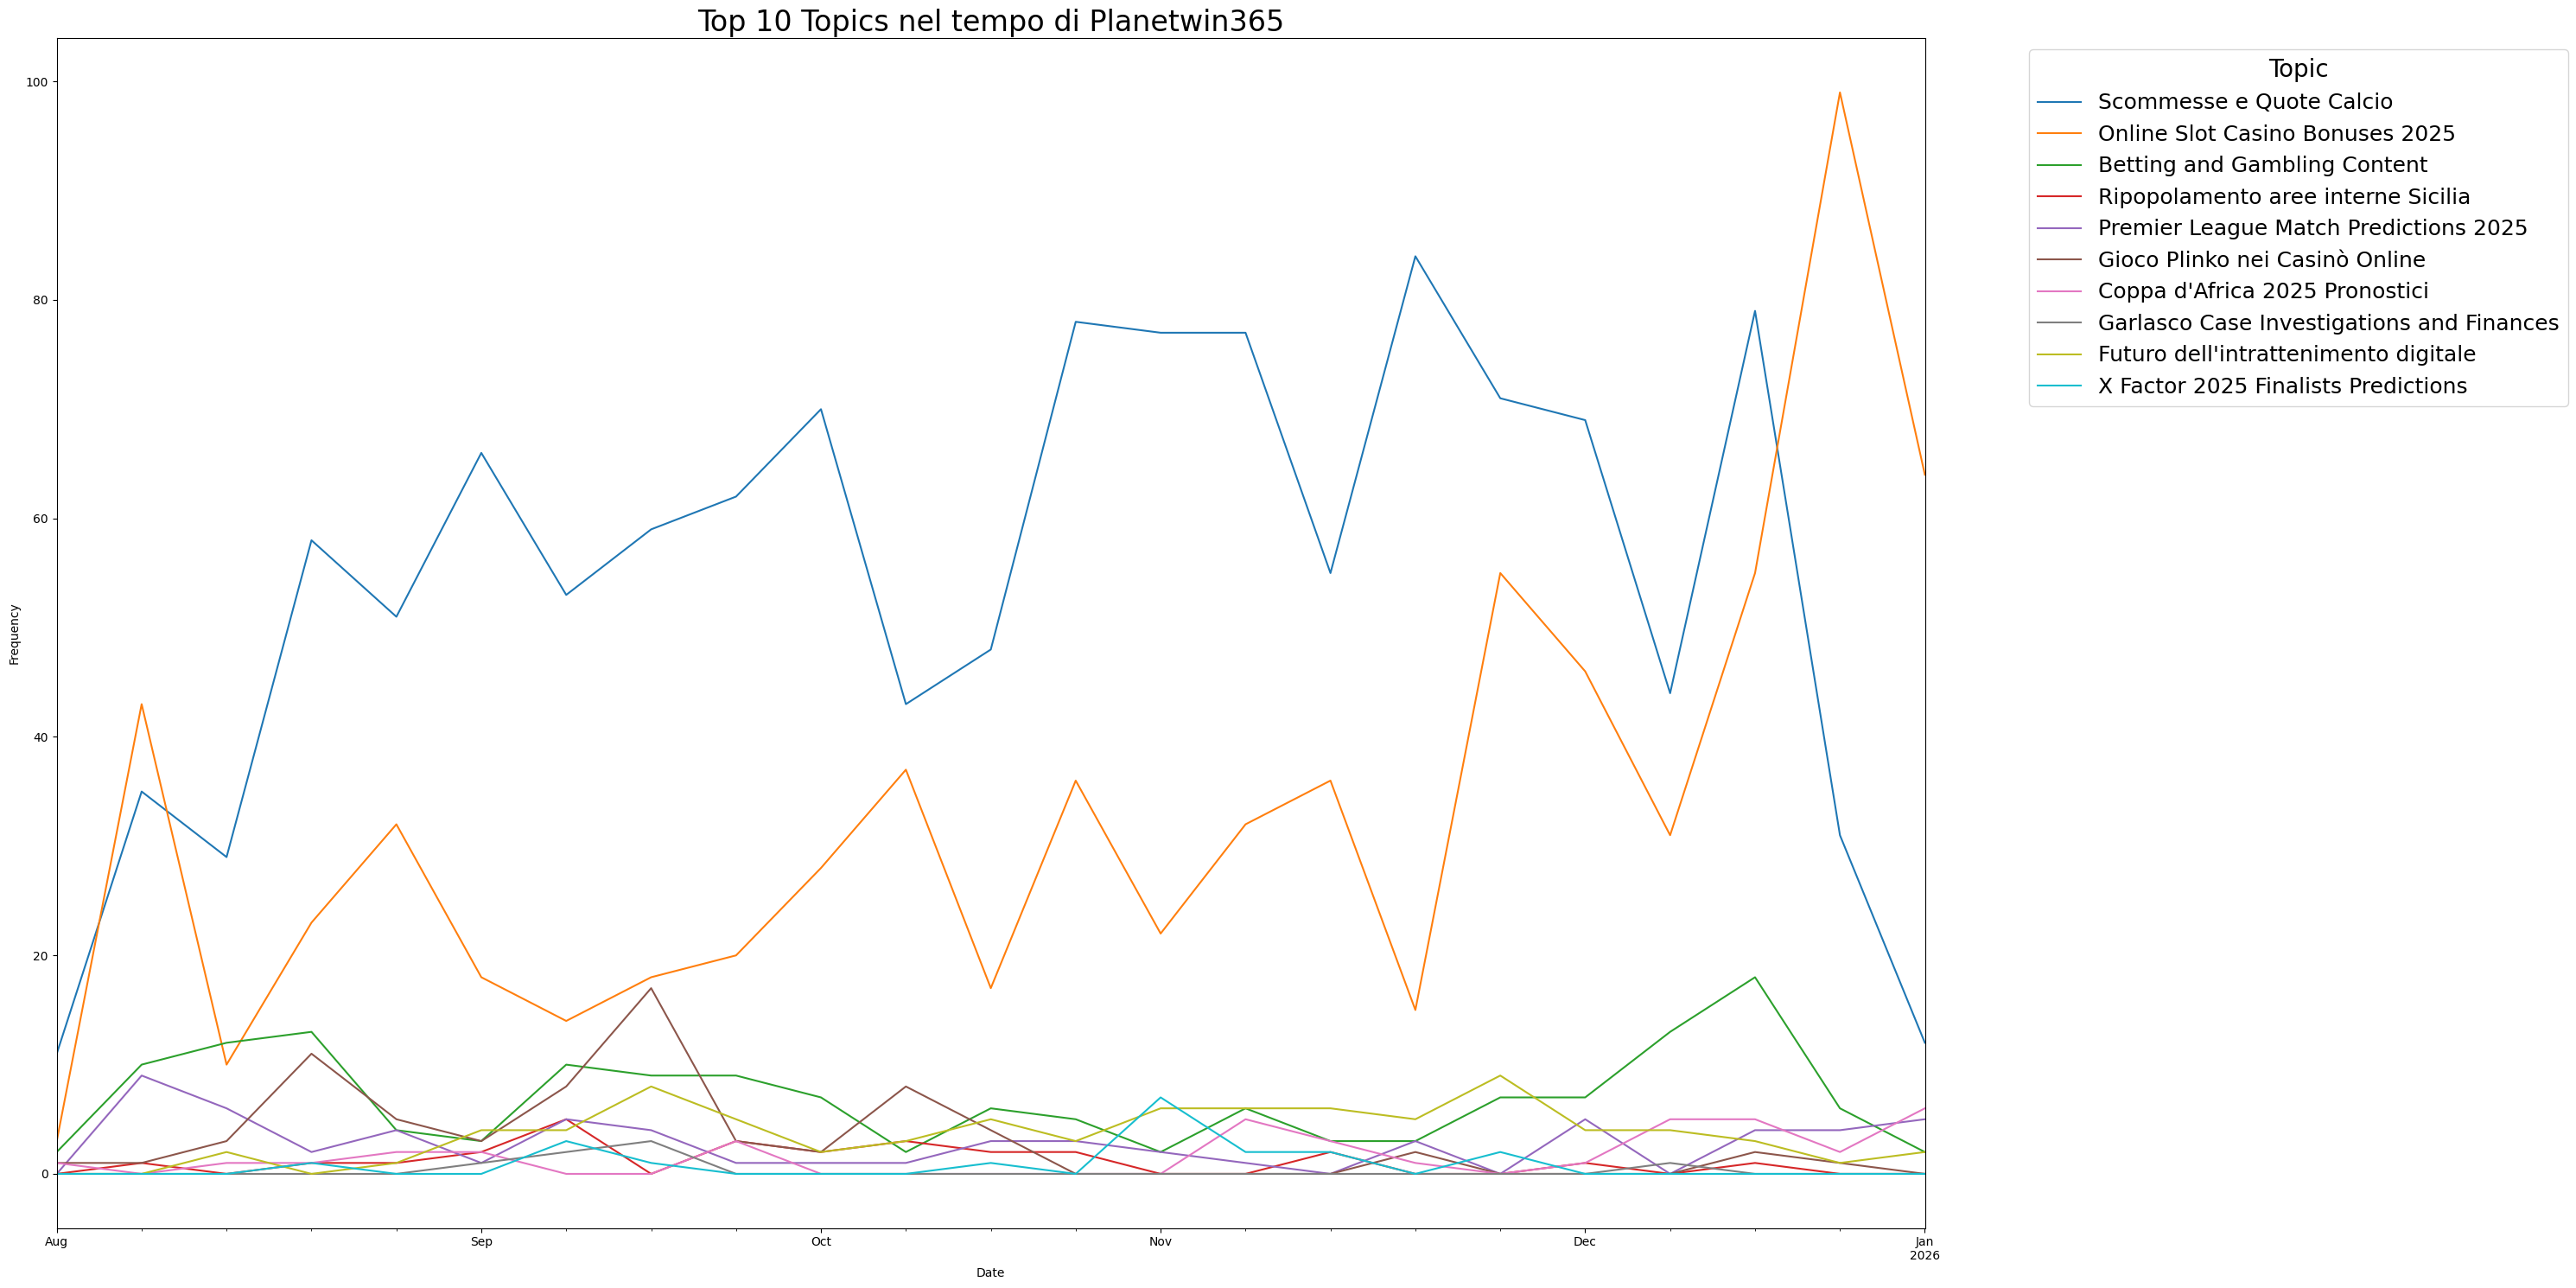

In [62]:
# Exclude -1 and get top topics by frequency
top_topics = planetwin365_df.loc[planetwin365_df["Topic"] != -1, "Topic"].value_counts().head(10).index

# Topic -> label mapping
topic_labels = (
    planetwin365_df.loc[planetwin365_df["Topic"].isin(top_topics), ["Topic", "Labels"]]
    .drop_duplicates("Topic")
    .set_index("Topic")["Labels"]
)

# Count by date and topic
planetwin365_df["published_date"] = pd.to_datetime(planetwin365_df["published_date"], errors="coerce")
counts = (
    planetwin365_df[planetwin365_df["Topic"].isin(top_topics)]
    .groupby([planetwin365_df["published_date"].dt.date, "Topic"])
    .size()
    .unstack(fill_value=0)
)

# smooth: weekly resample + 1-week rolling mean
counts.index = pd.to_datetime(counts.index)
counts = counts.resample("W").sum().rolling(1, min_periods=1).mean()

# Plot with label names
ax = counts.plot(figsize=(30, 15))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [topic_labels.get(int(t), t) for t in labels],
          title="Topic", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=18, title_fontsize=20)
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.title("Top 10 Topics nel tempo di Planetwin365", fontsize=24)
plt.tight_layout()
plt.savefig('planetwin365_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()